# Vehicle detect and count

### Machine configuration

In [ ]:
!nvidia-smi

Sat Aug  5 18:28:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Installing YoloV8

In [ ]:
!pip install roboflow
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4e670f9c6b6f43a4f64694f1b61dfd49b35aca307d62e7c27f262ff65bdd308c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 9.3 MB/s eta 0:00:00


### Checking YOLOv8

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Downloading Dataset

In [ ]:
%cd /content/drive/MyDrive/thesis/vehicle_project

/content/drive/MyDrive/thesis/vehicle_project


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="tTcJryCVyEmh8URU3UGs")
project = rf.workspace("traffic-hxmtd").project("vehicles-aet91")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.148, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to vehicles-3 in yolov8:: 100%|██████████| 34994/34994 [05:49<00:00, 100.06it/s]


### Training with custom dataset

In [ ]:
%cd /content/drive/MyDrive/thesis/vehicle_project

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=15 imgsz=640 plots=True

/content/drive/MyDrive/thesis/vehicle_project
100% 21.5M/21.5M [00:01<00:00, 13.6MB/s]
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

### Traning result

#### Result data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/results.csv')
df

epoch           train/box_loss           train/cls_loss  \
0                         0                  1.07150                  1.56300   
1                         1                  1.04830                  0.95663   
2                         2                  1.04830                  0.91801   
3                         3                  1.00600                  0.84075   
4                         4                  0.95818                  0.76677   
5                         5                  0.90101                  0.63698   
6                         6                  0.85096                  0.56706   
7                         7                  0.80651                  0.51514   
8                         8                  0.76407                  0.47793   
9                         9                  0.73010                  0.44535   
10                       10                  0.69590                  0.41193   
11                       11                  0.66332                  0.38819   
12                       12                  0.63469                  0.36270   
13                       13                  0.59806                  0.34091   
14                       14                  0.56654                  0.31751   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                    1.3759                  0.78326                  0.34190   
1                    1.3406                  0.67867                  0.41072   
2                    1.3406                  0.85004                  0.35334   
3                    1.3049                  0.80146                  0.44100   
4                    1.2750                  0.69730                  0.45915   
5                    1.2890                  0.75783                  0.44705   
6                    1.2472                  0.68610                  0.48356   
7                    1.2113                  0.82733                  0.46179   
8                    1.1840                  0.74332                  0.48978   
9                    1.1535                  0.62293                  0.56641   
10                   1.1274                  0.72675                  0.48159   
11                   1.1037                  0.54996                  0.55367   
12                   1.0835                  0.47879                  0.53872   
13                   1.0601                  0.51375                  0.51447   
14                   1.0408                  0.63961                  0.58464   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                   0.36989                  0.25298                  1.08550   
1                   0.44463                  0.29856                  1.11880   
2                   0.39540                  0.27767                  1.06510   
3                   0.47157                  0.33293                  1.03030   
4                   0.47493                  0.34299                  0.98580   
5                   0.46553                  0.33972                  0.95968   
6                   0.50039                  0.36737                  0.90980   
7                   0.49638                  0.37252                  0.87449   
8                   0.50056                  0.37838                  0.85039   
9                   0.51164                  0.38339                  0.84487   
10                  0.52854                  0.39897                  0.81747   
11                  0.52431                  0.40107                  0.80258   
12                  0.51337                  0.40016                  0.77706   
13                  0.52555                  0.40248                  0.76206   
14                  0.56637                  0.43884                  0.74014   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   0.98901                   1.42

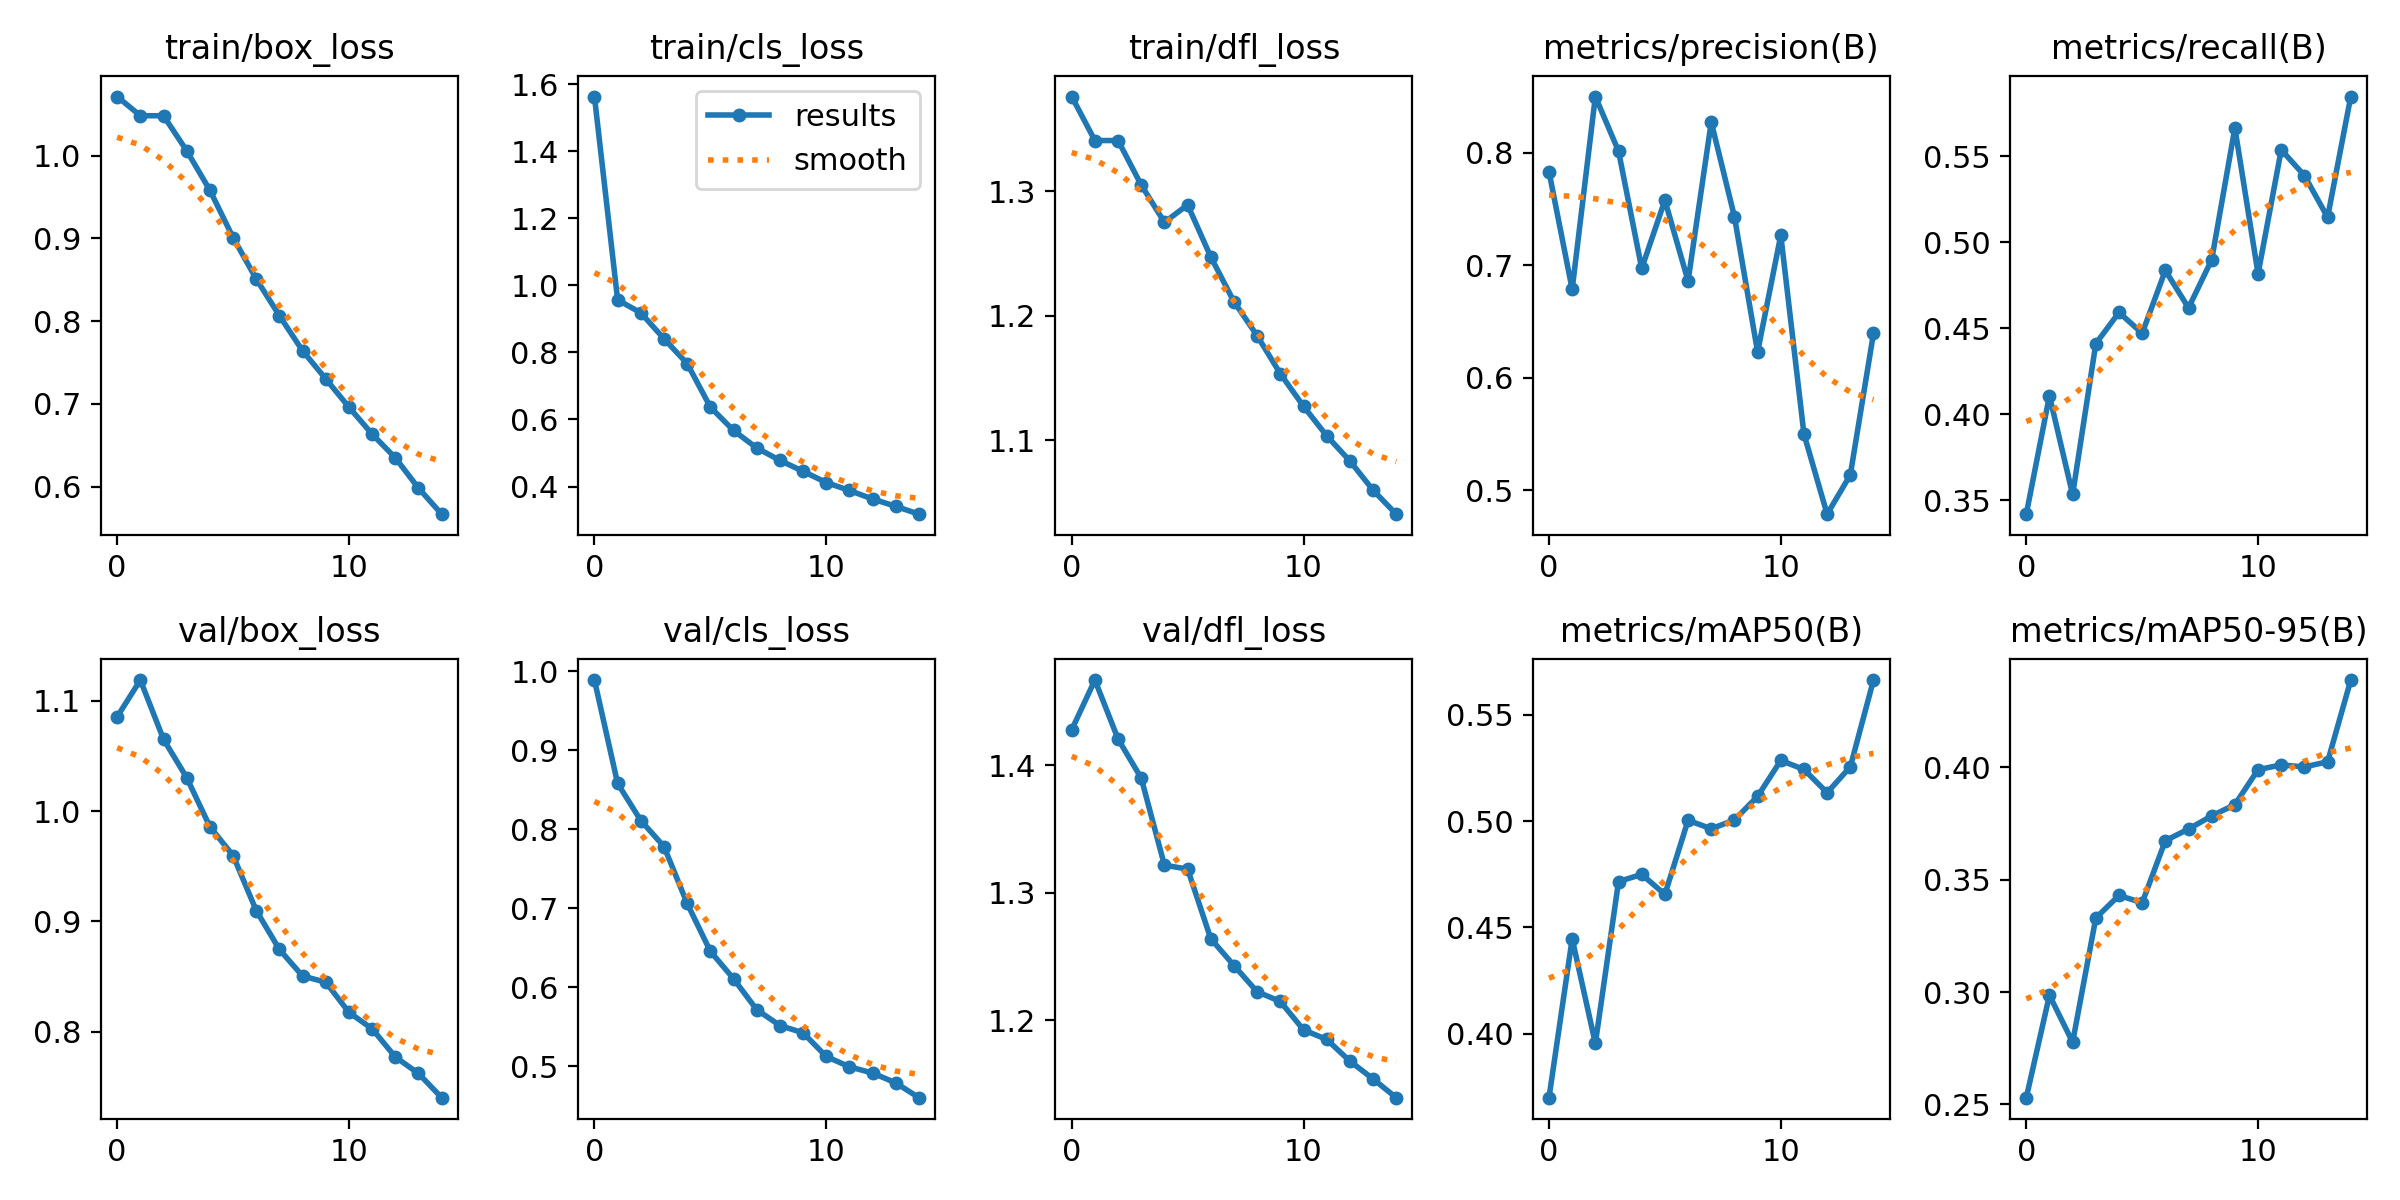

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/results.png', width=600)

#### Confusion matrix

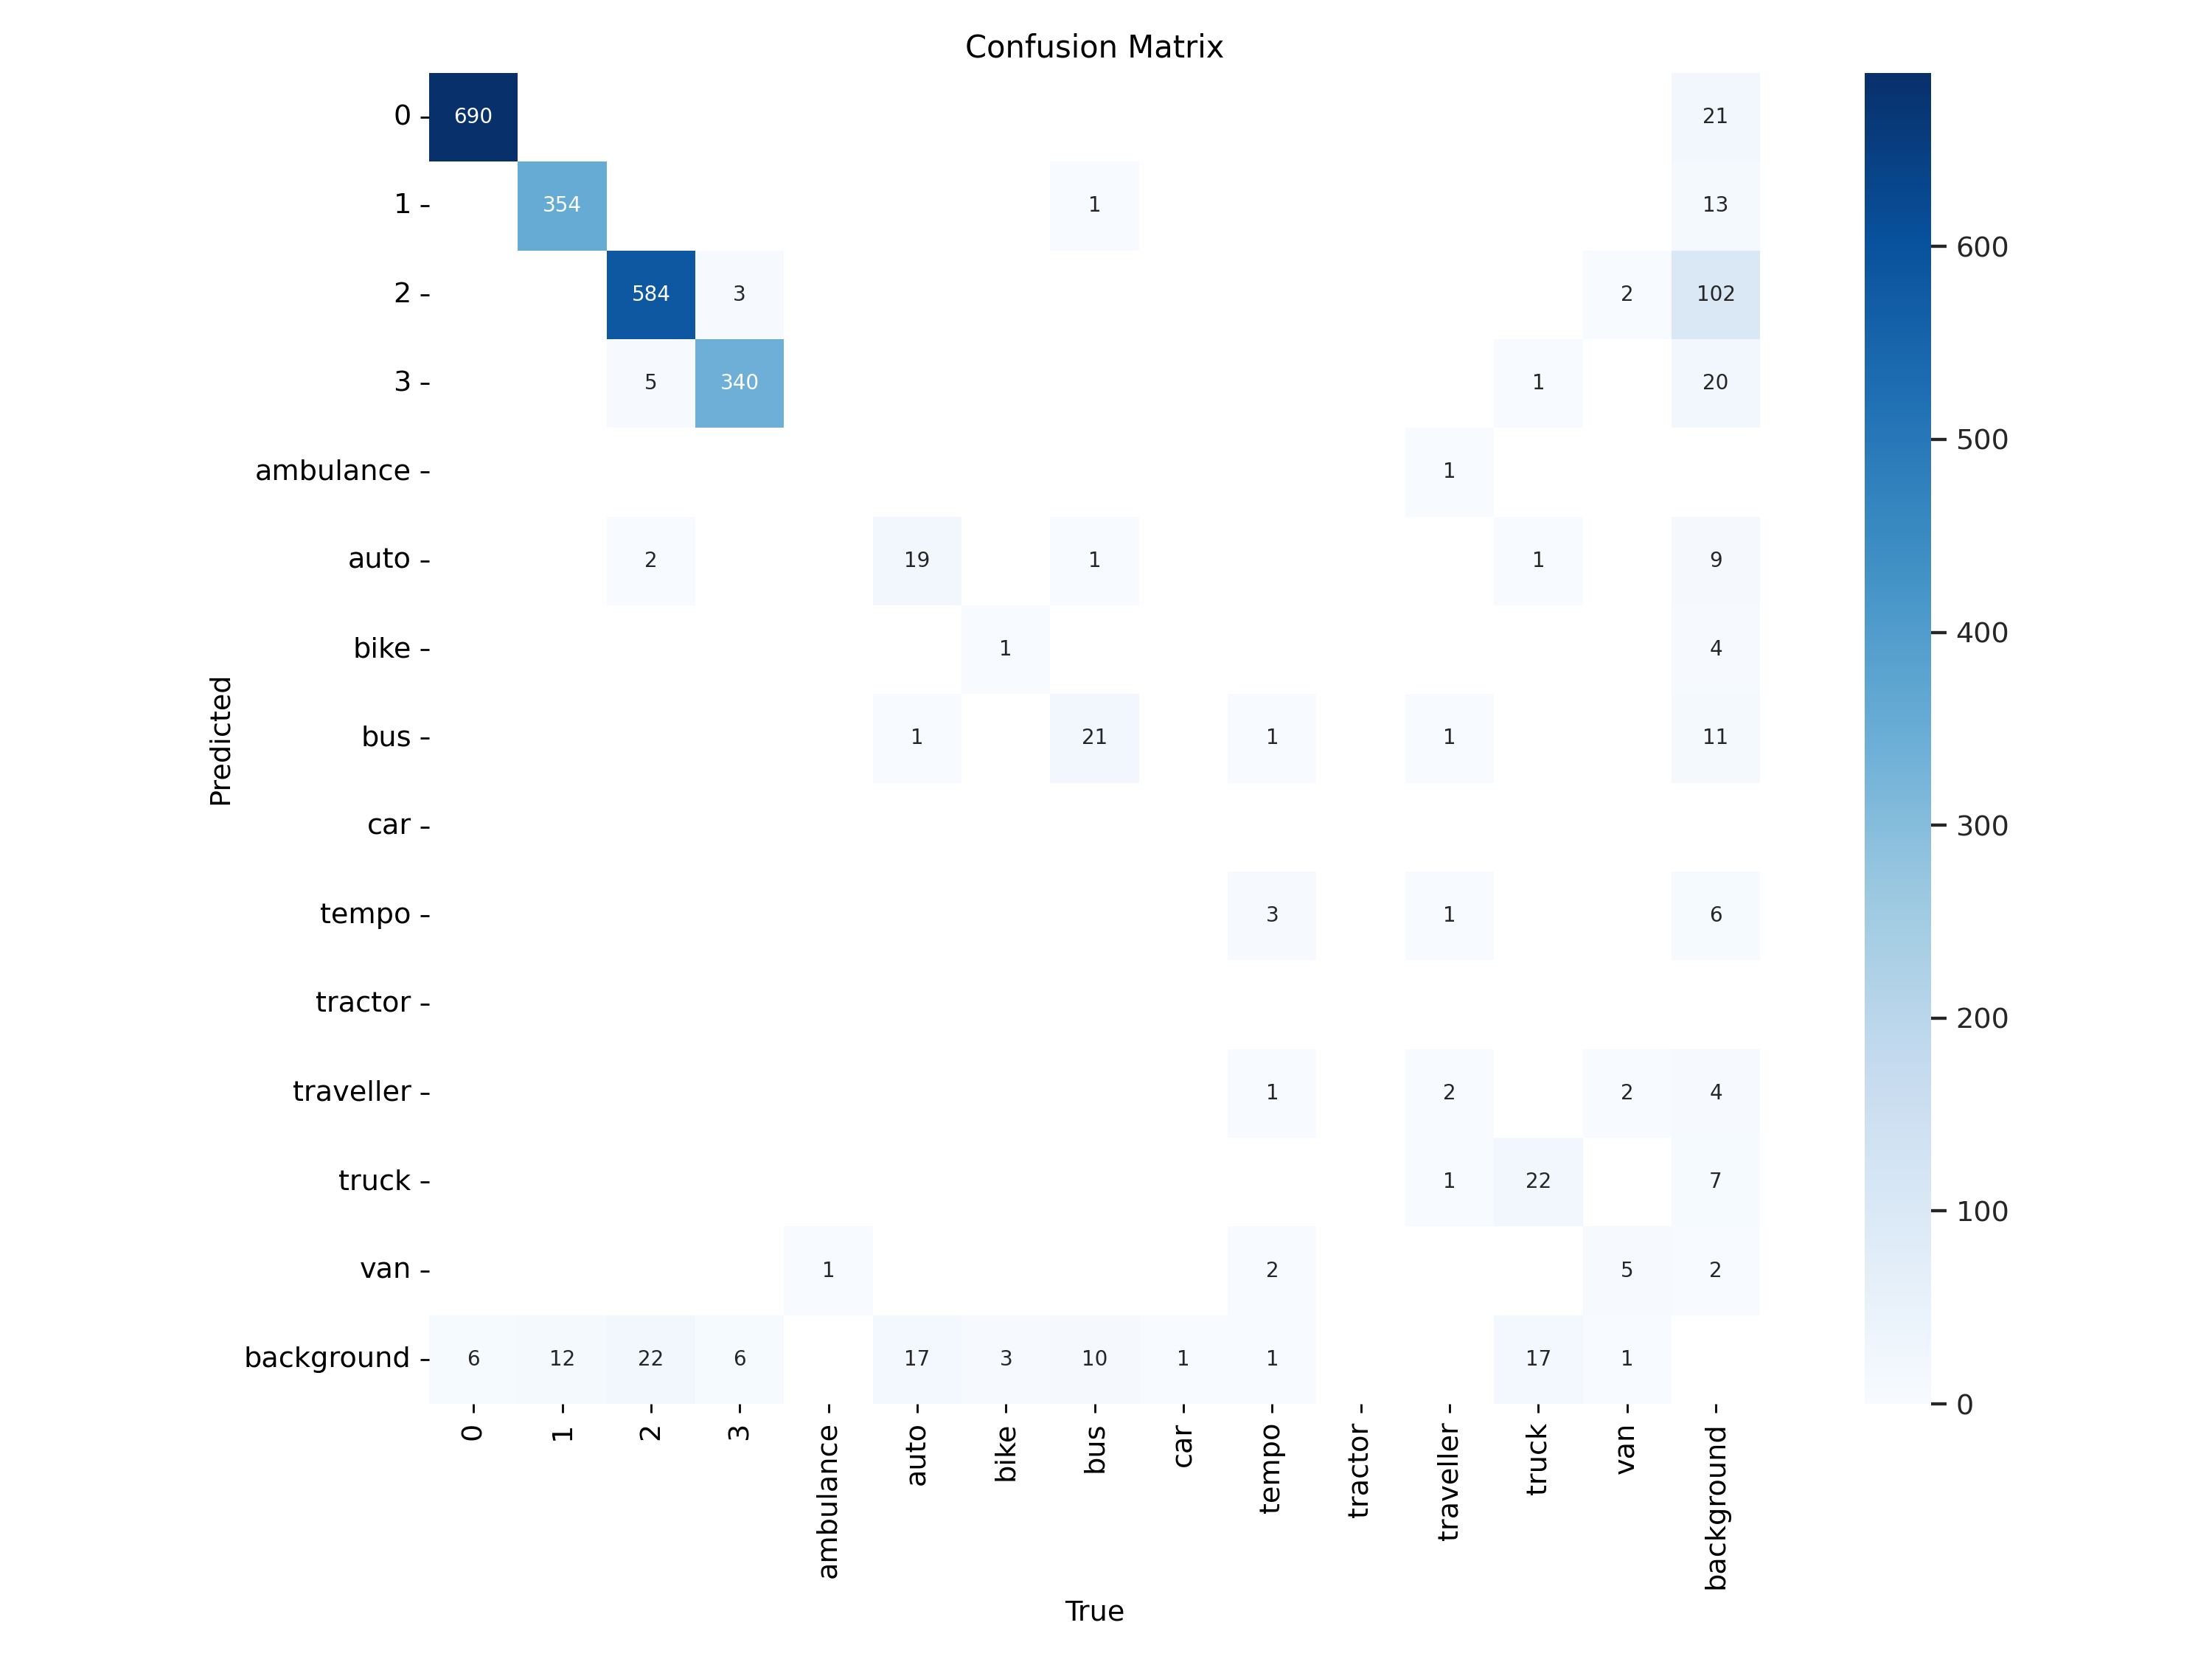

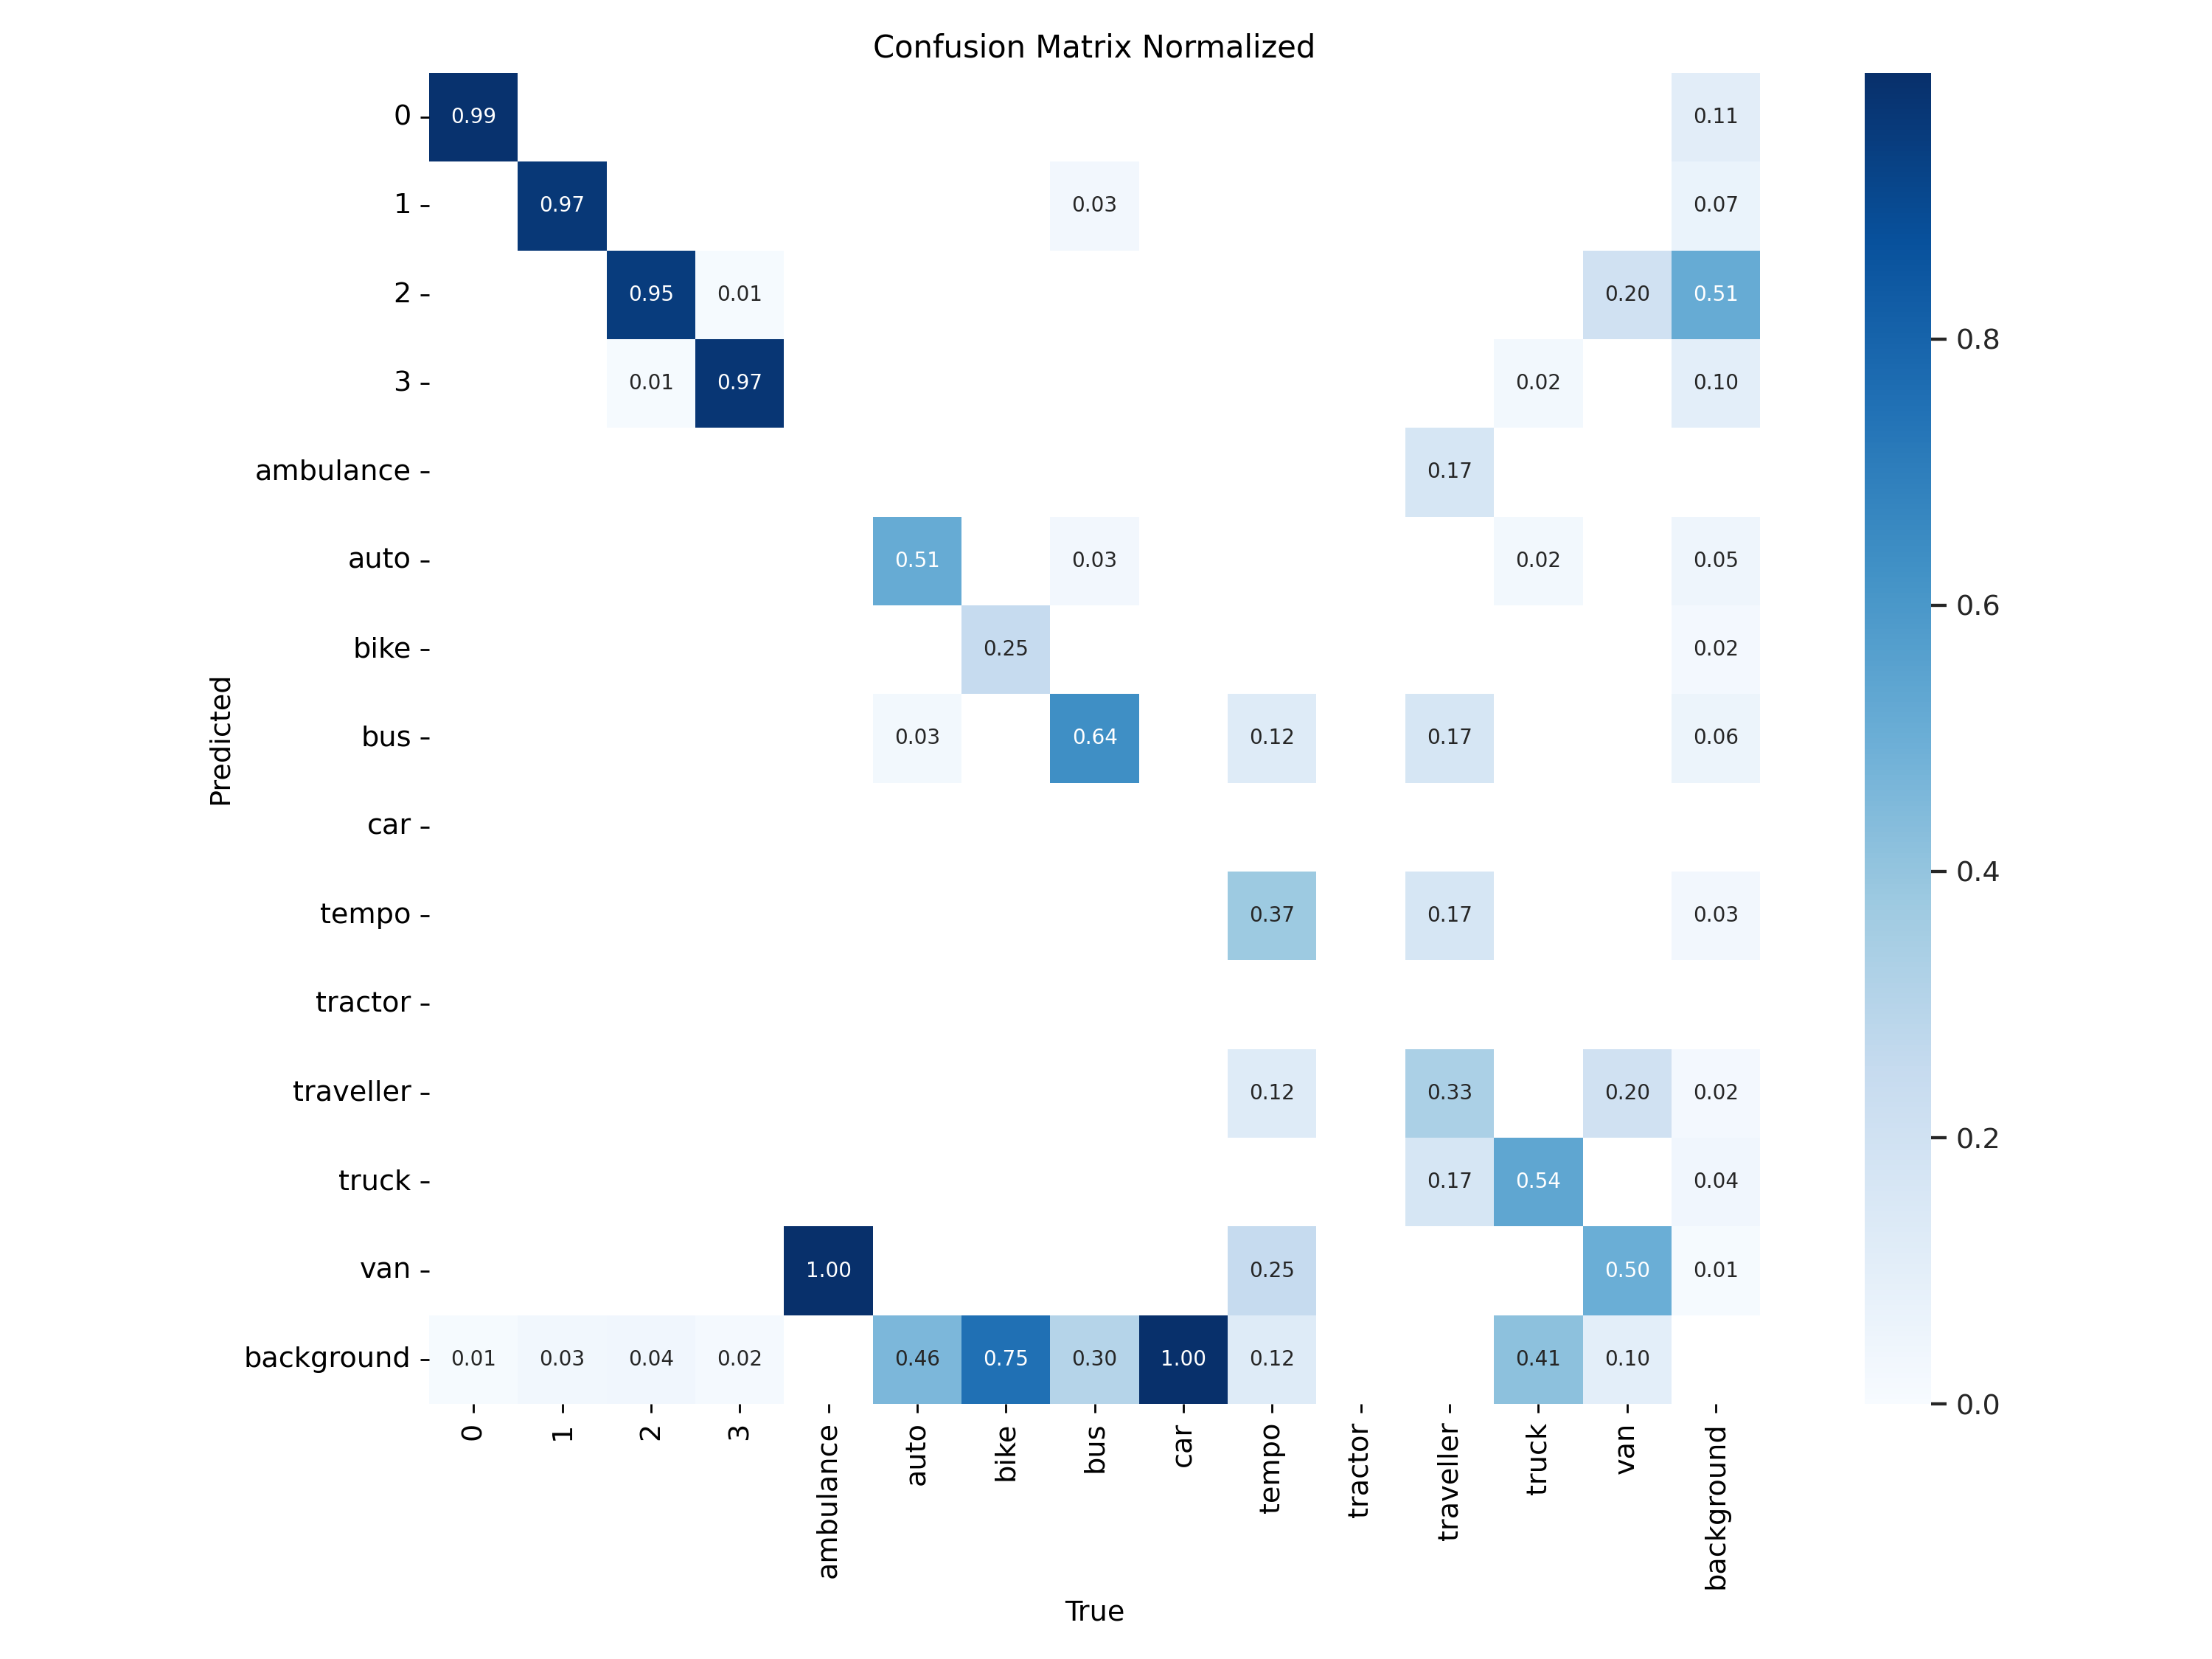

In [ ]:
display(Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/confusion_matrix.png', width=600) , Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/confusion_matrix_normalized.png', width=600))

#### F1 Confidence Curve

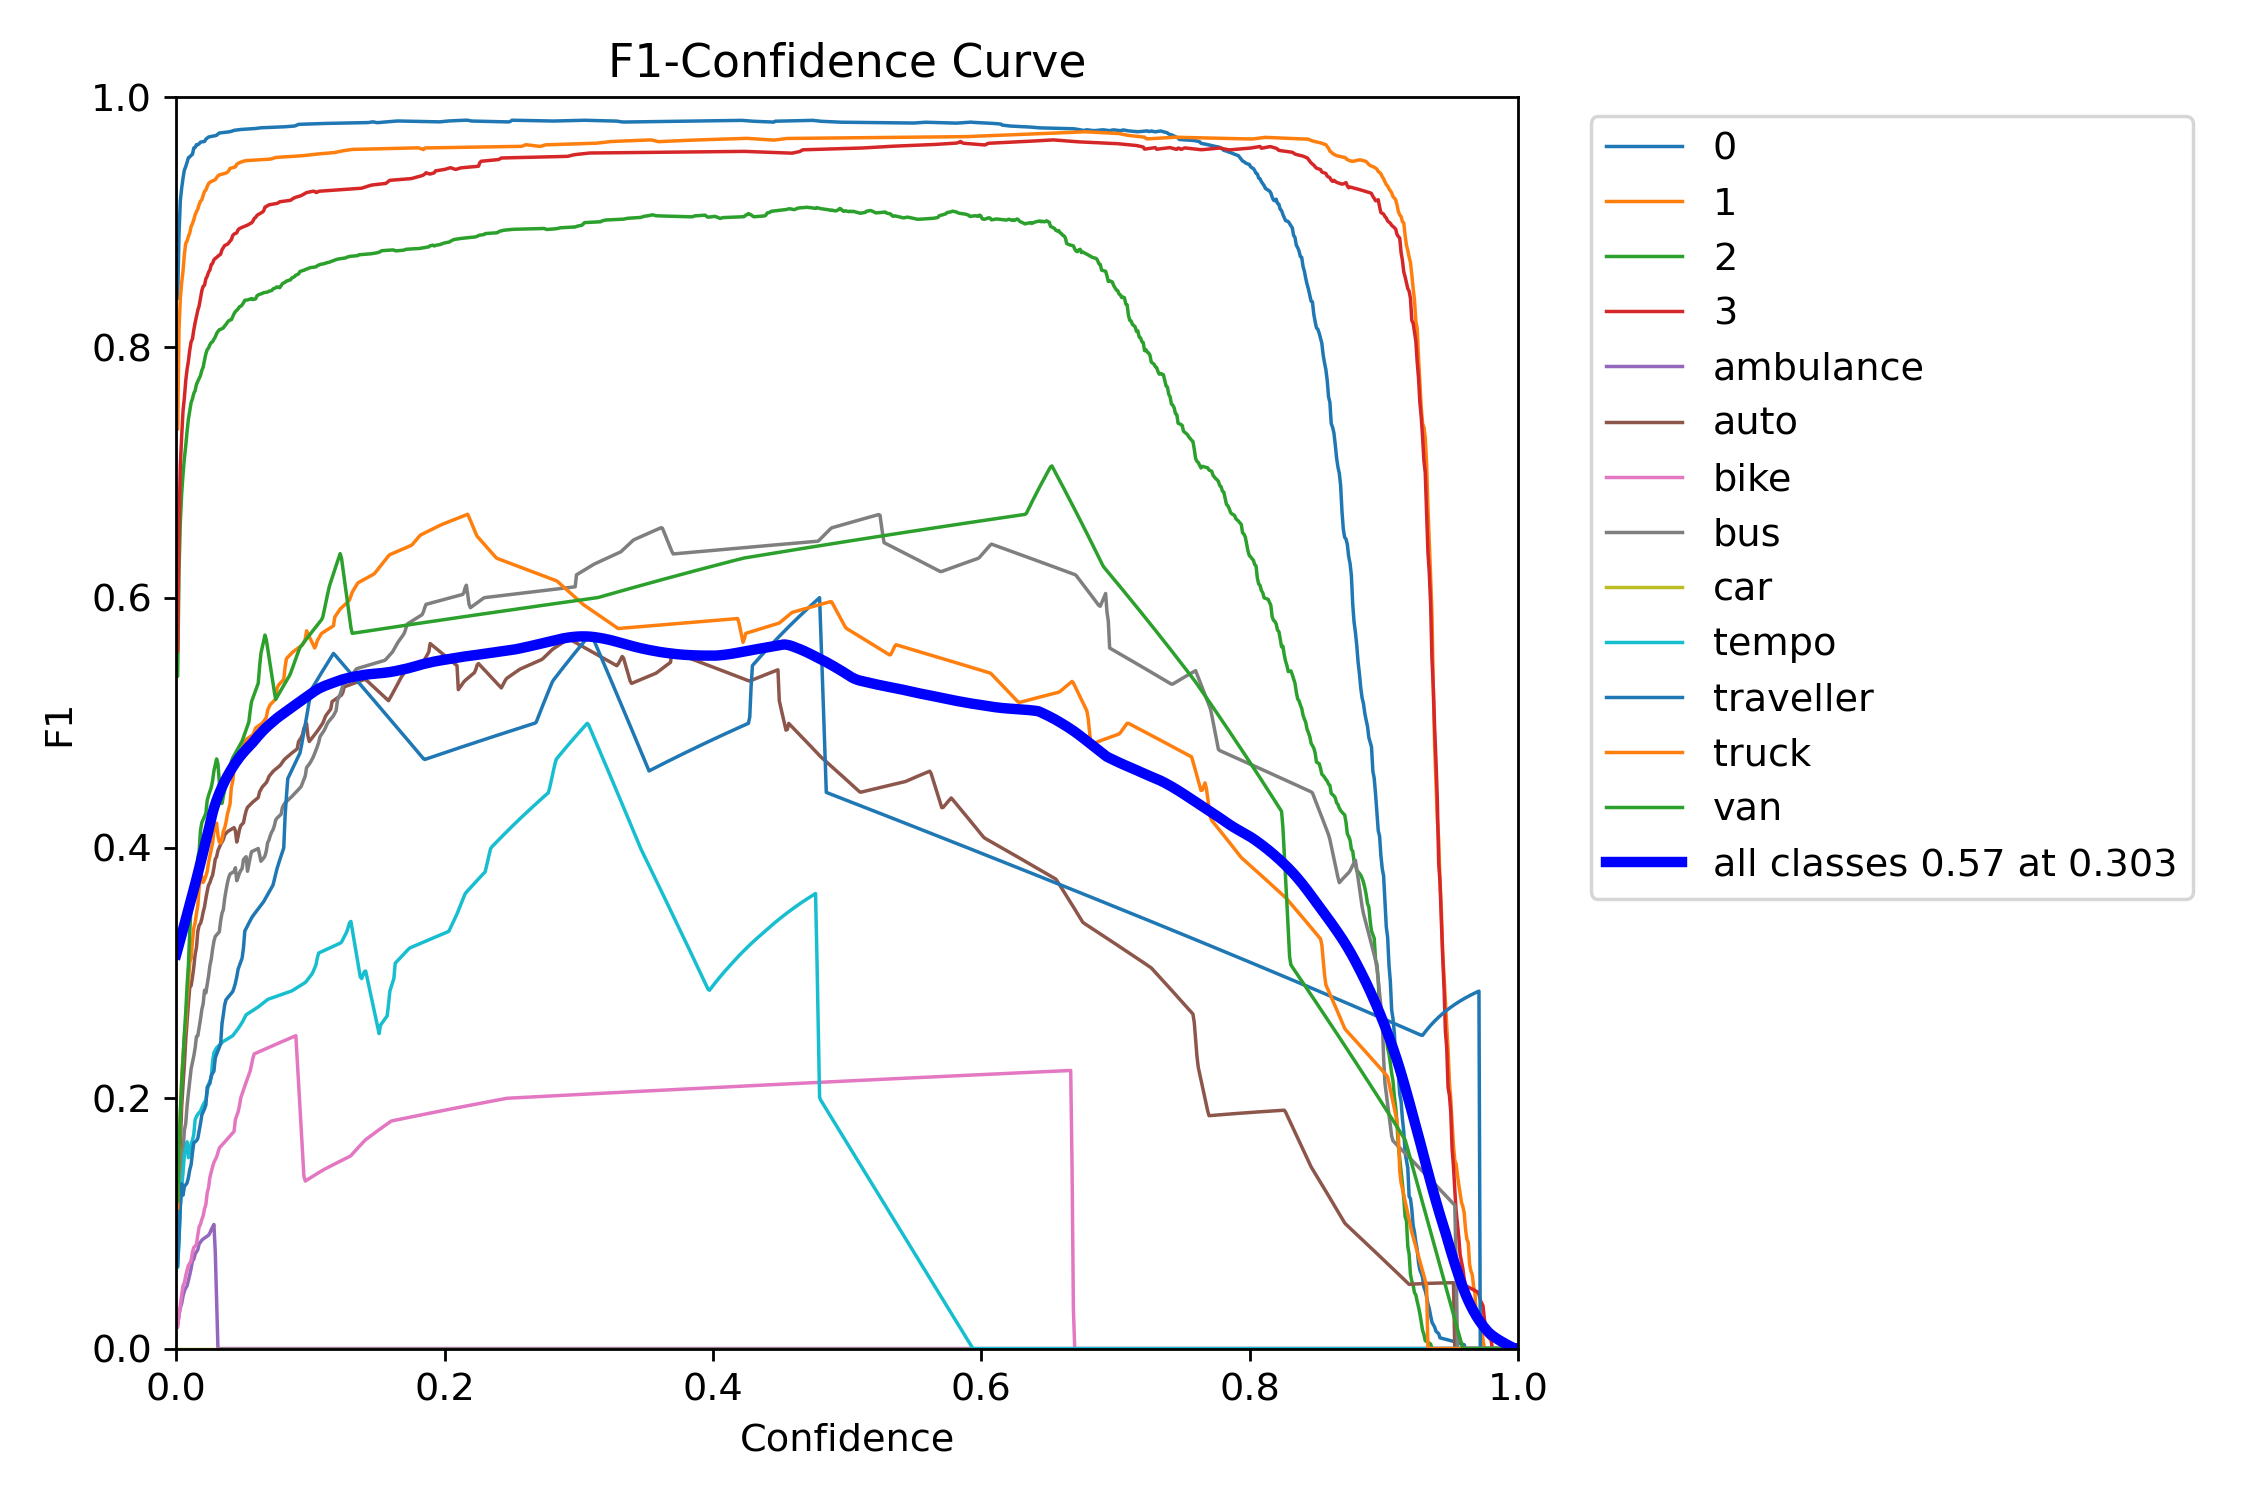

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/F1_curve.png', width=600)

#### Precision Recall Curve

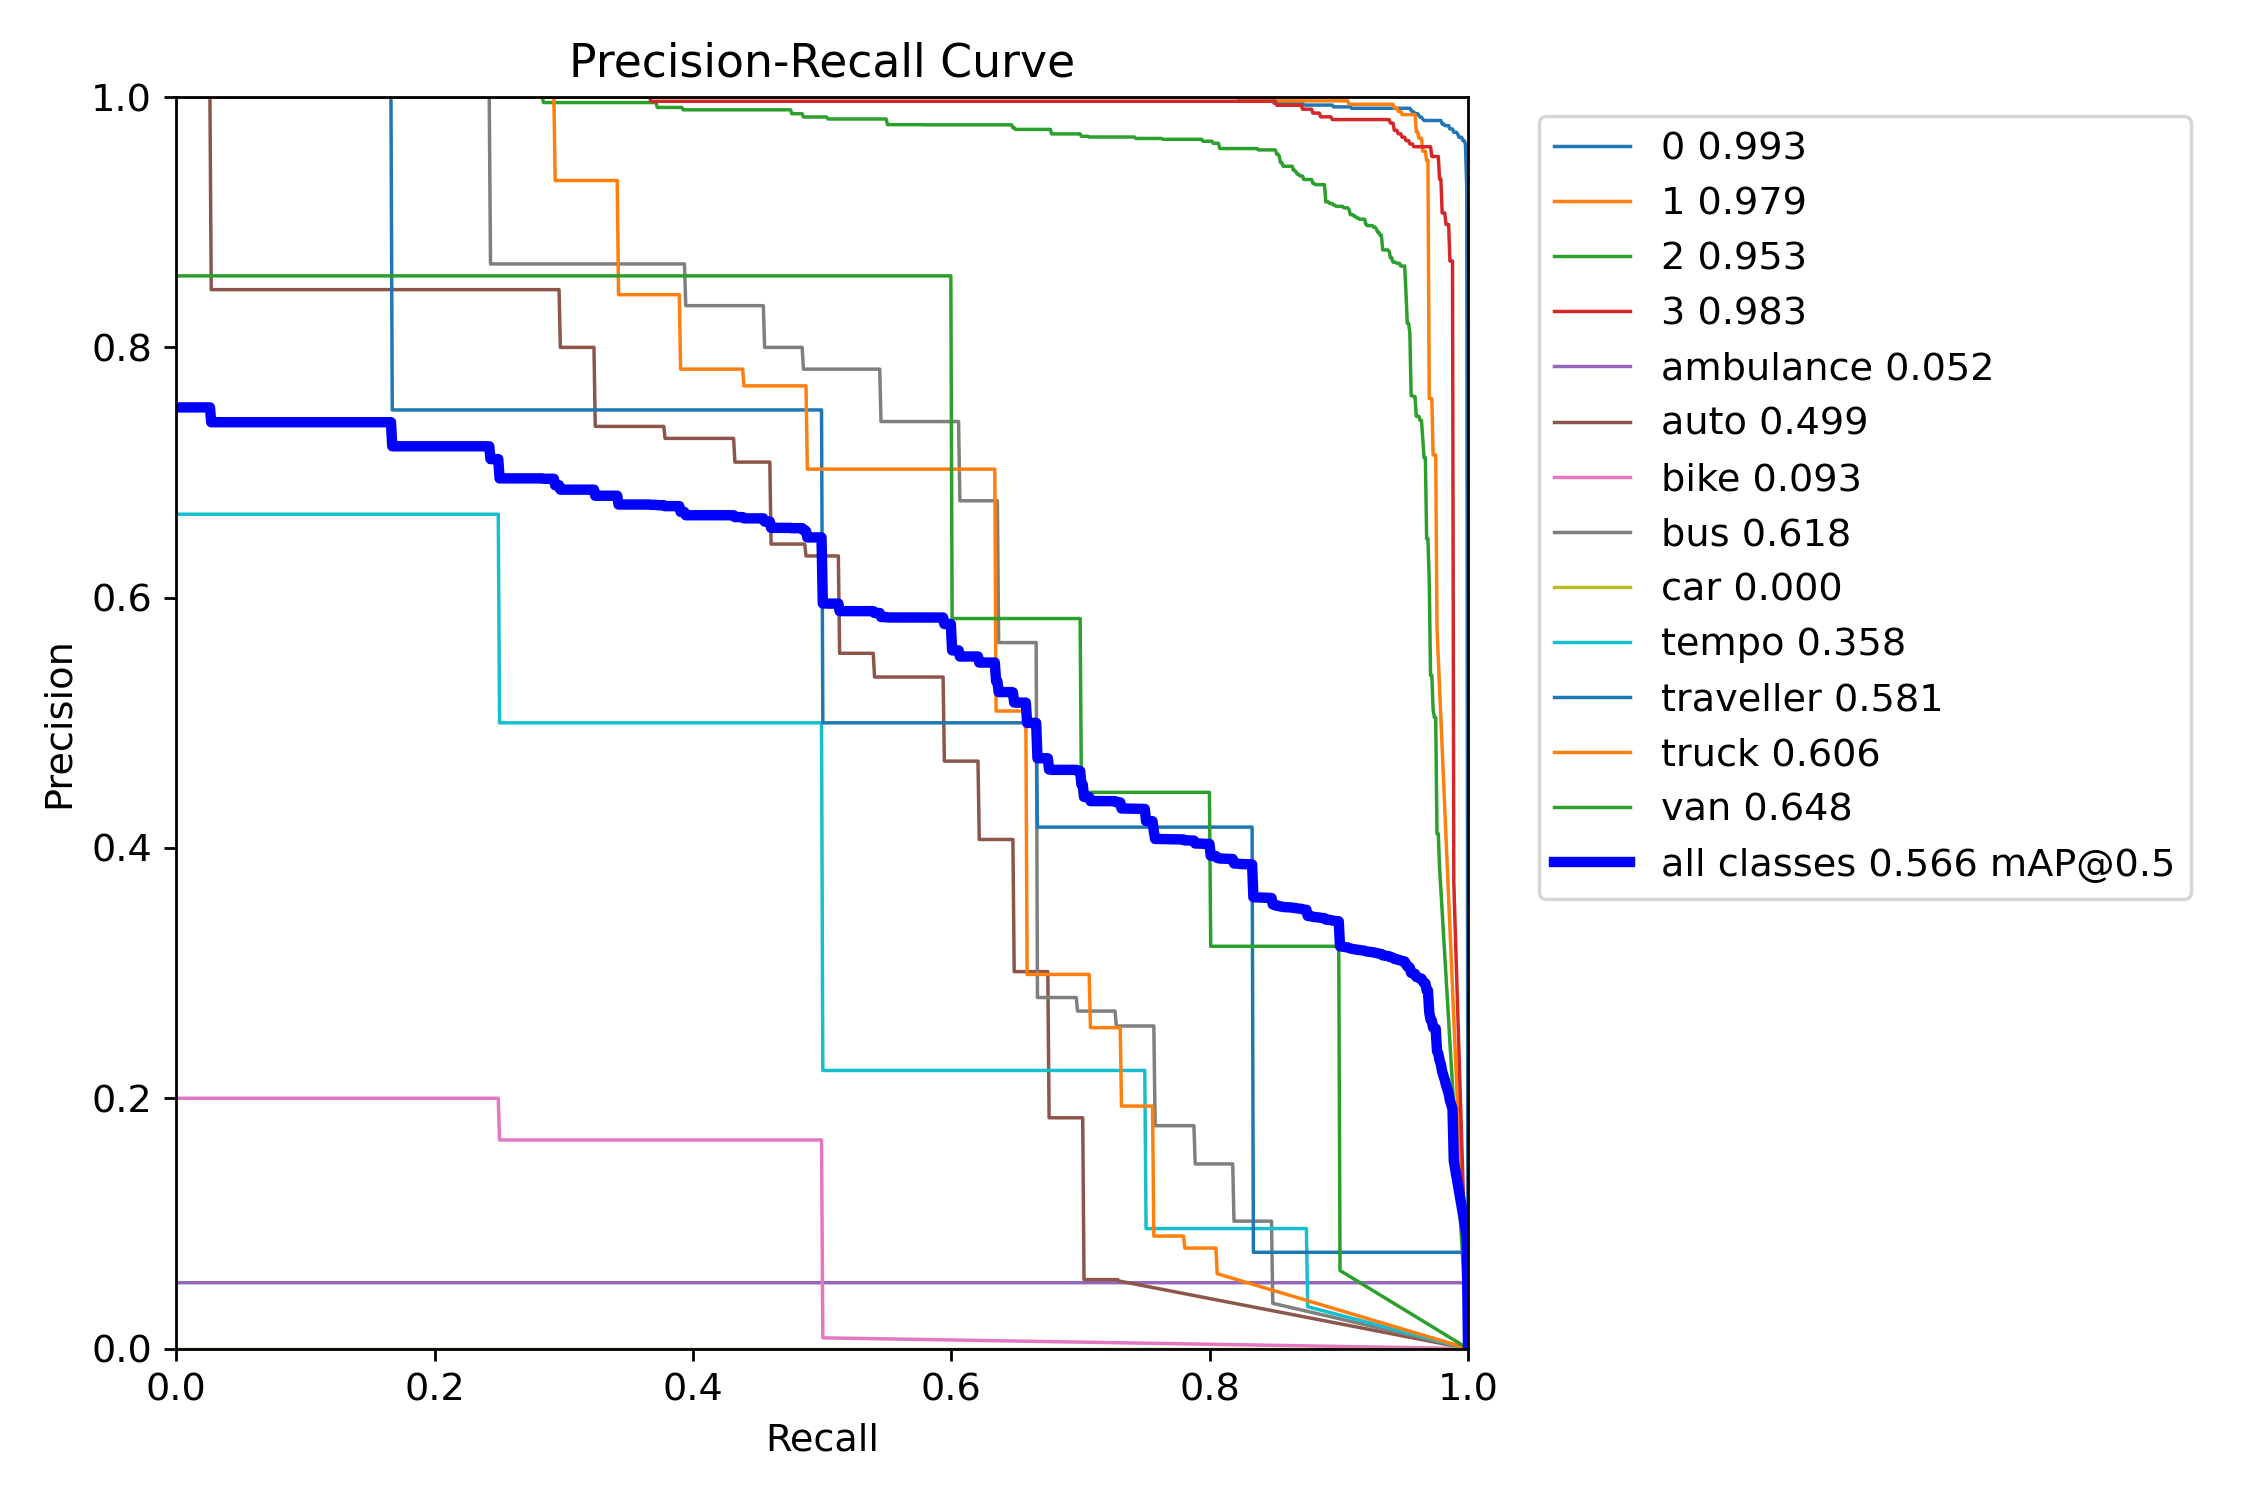

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/PR_curve.png', width=600)

#### Precision Confidence Curve

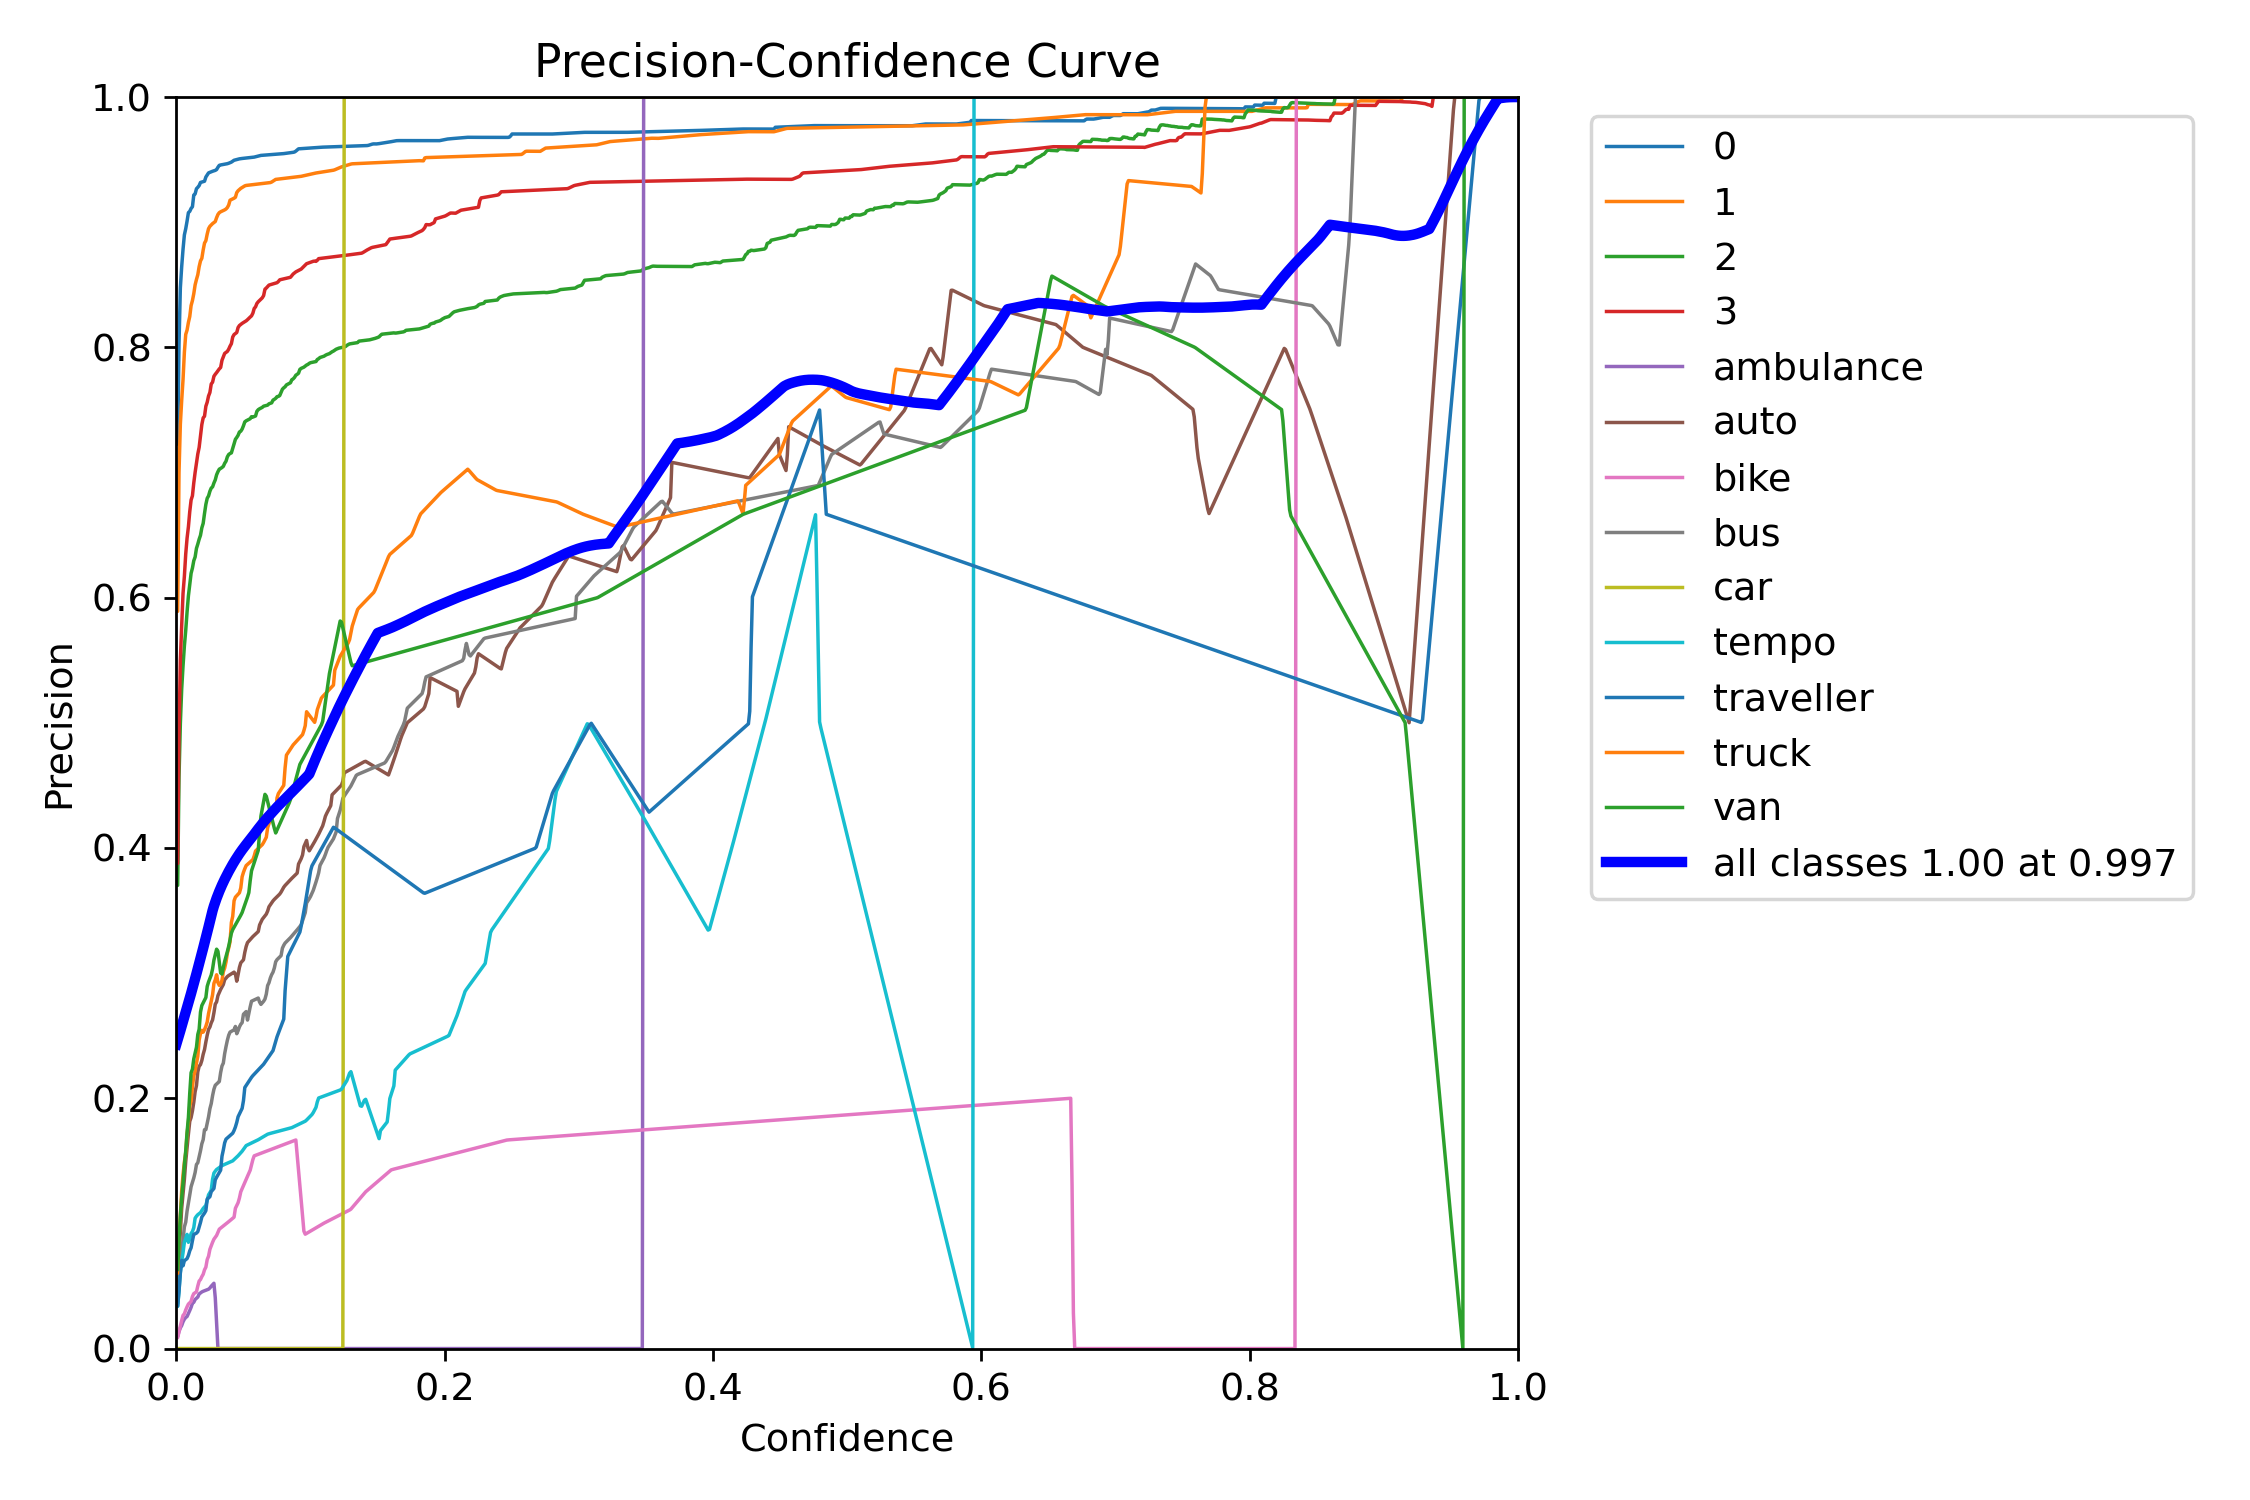

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/P_curve.png', width=600)

#### Recall Confidence Curve

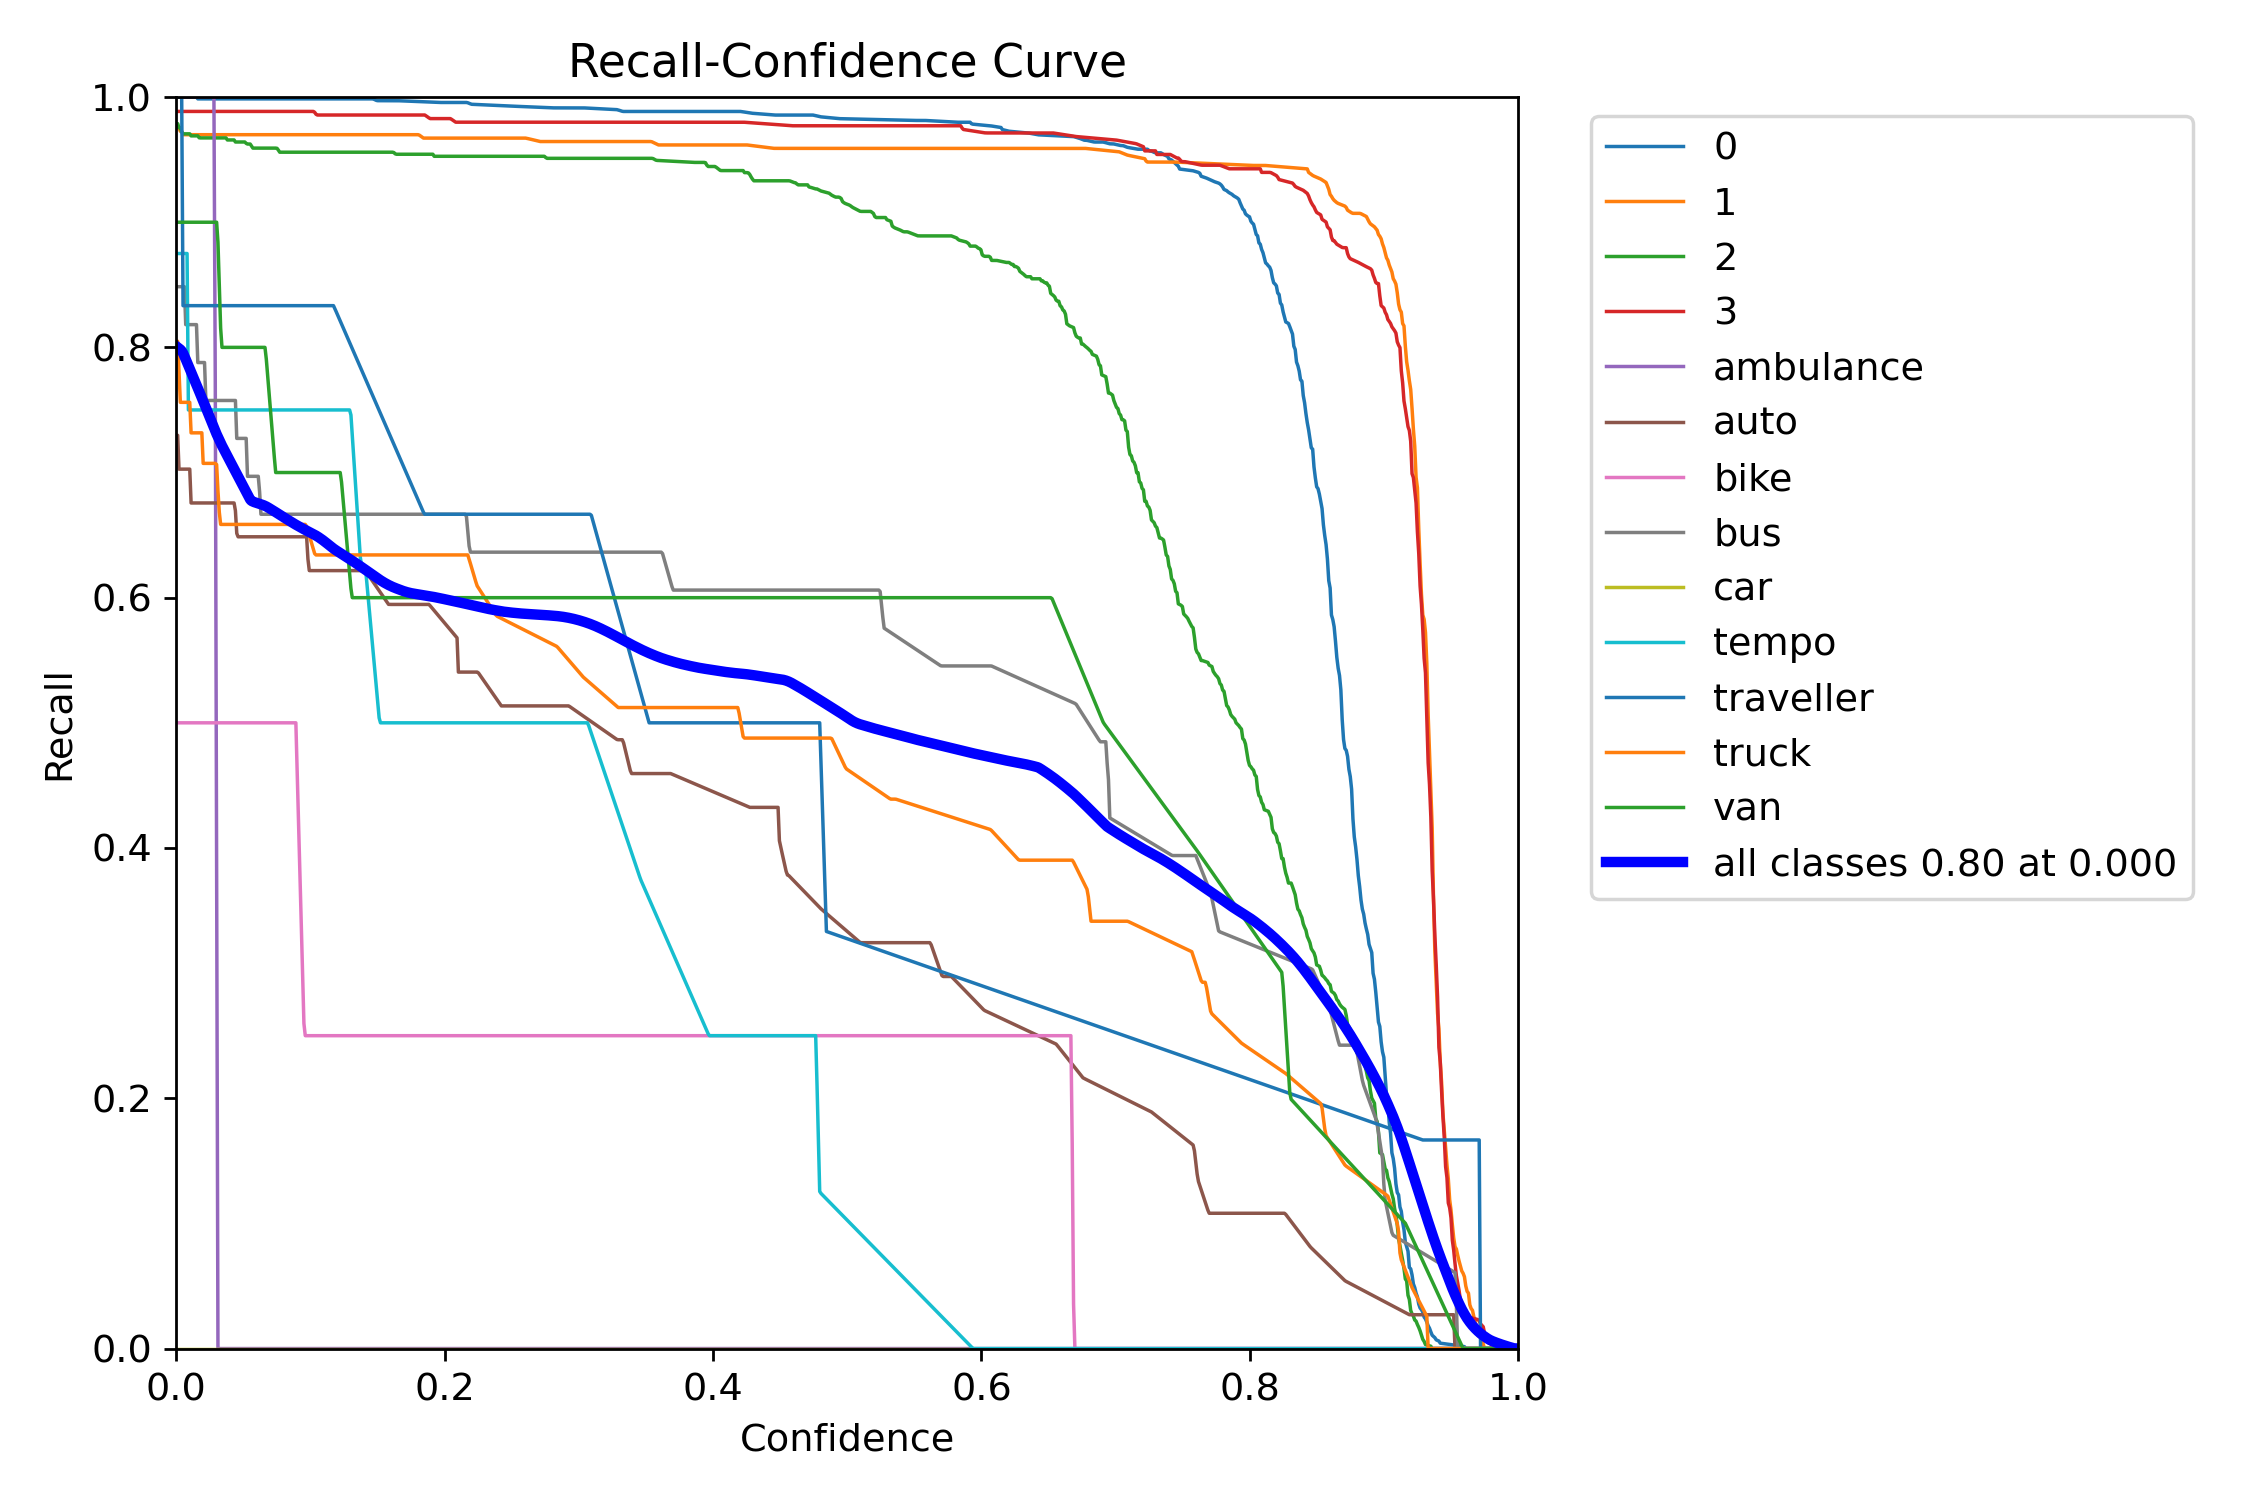

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/R_curve.png', width=600)

### Training images

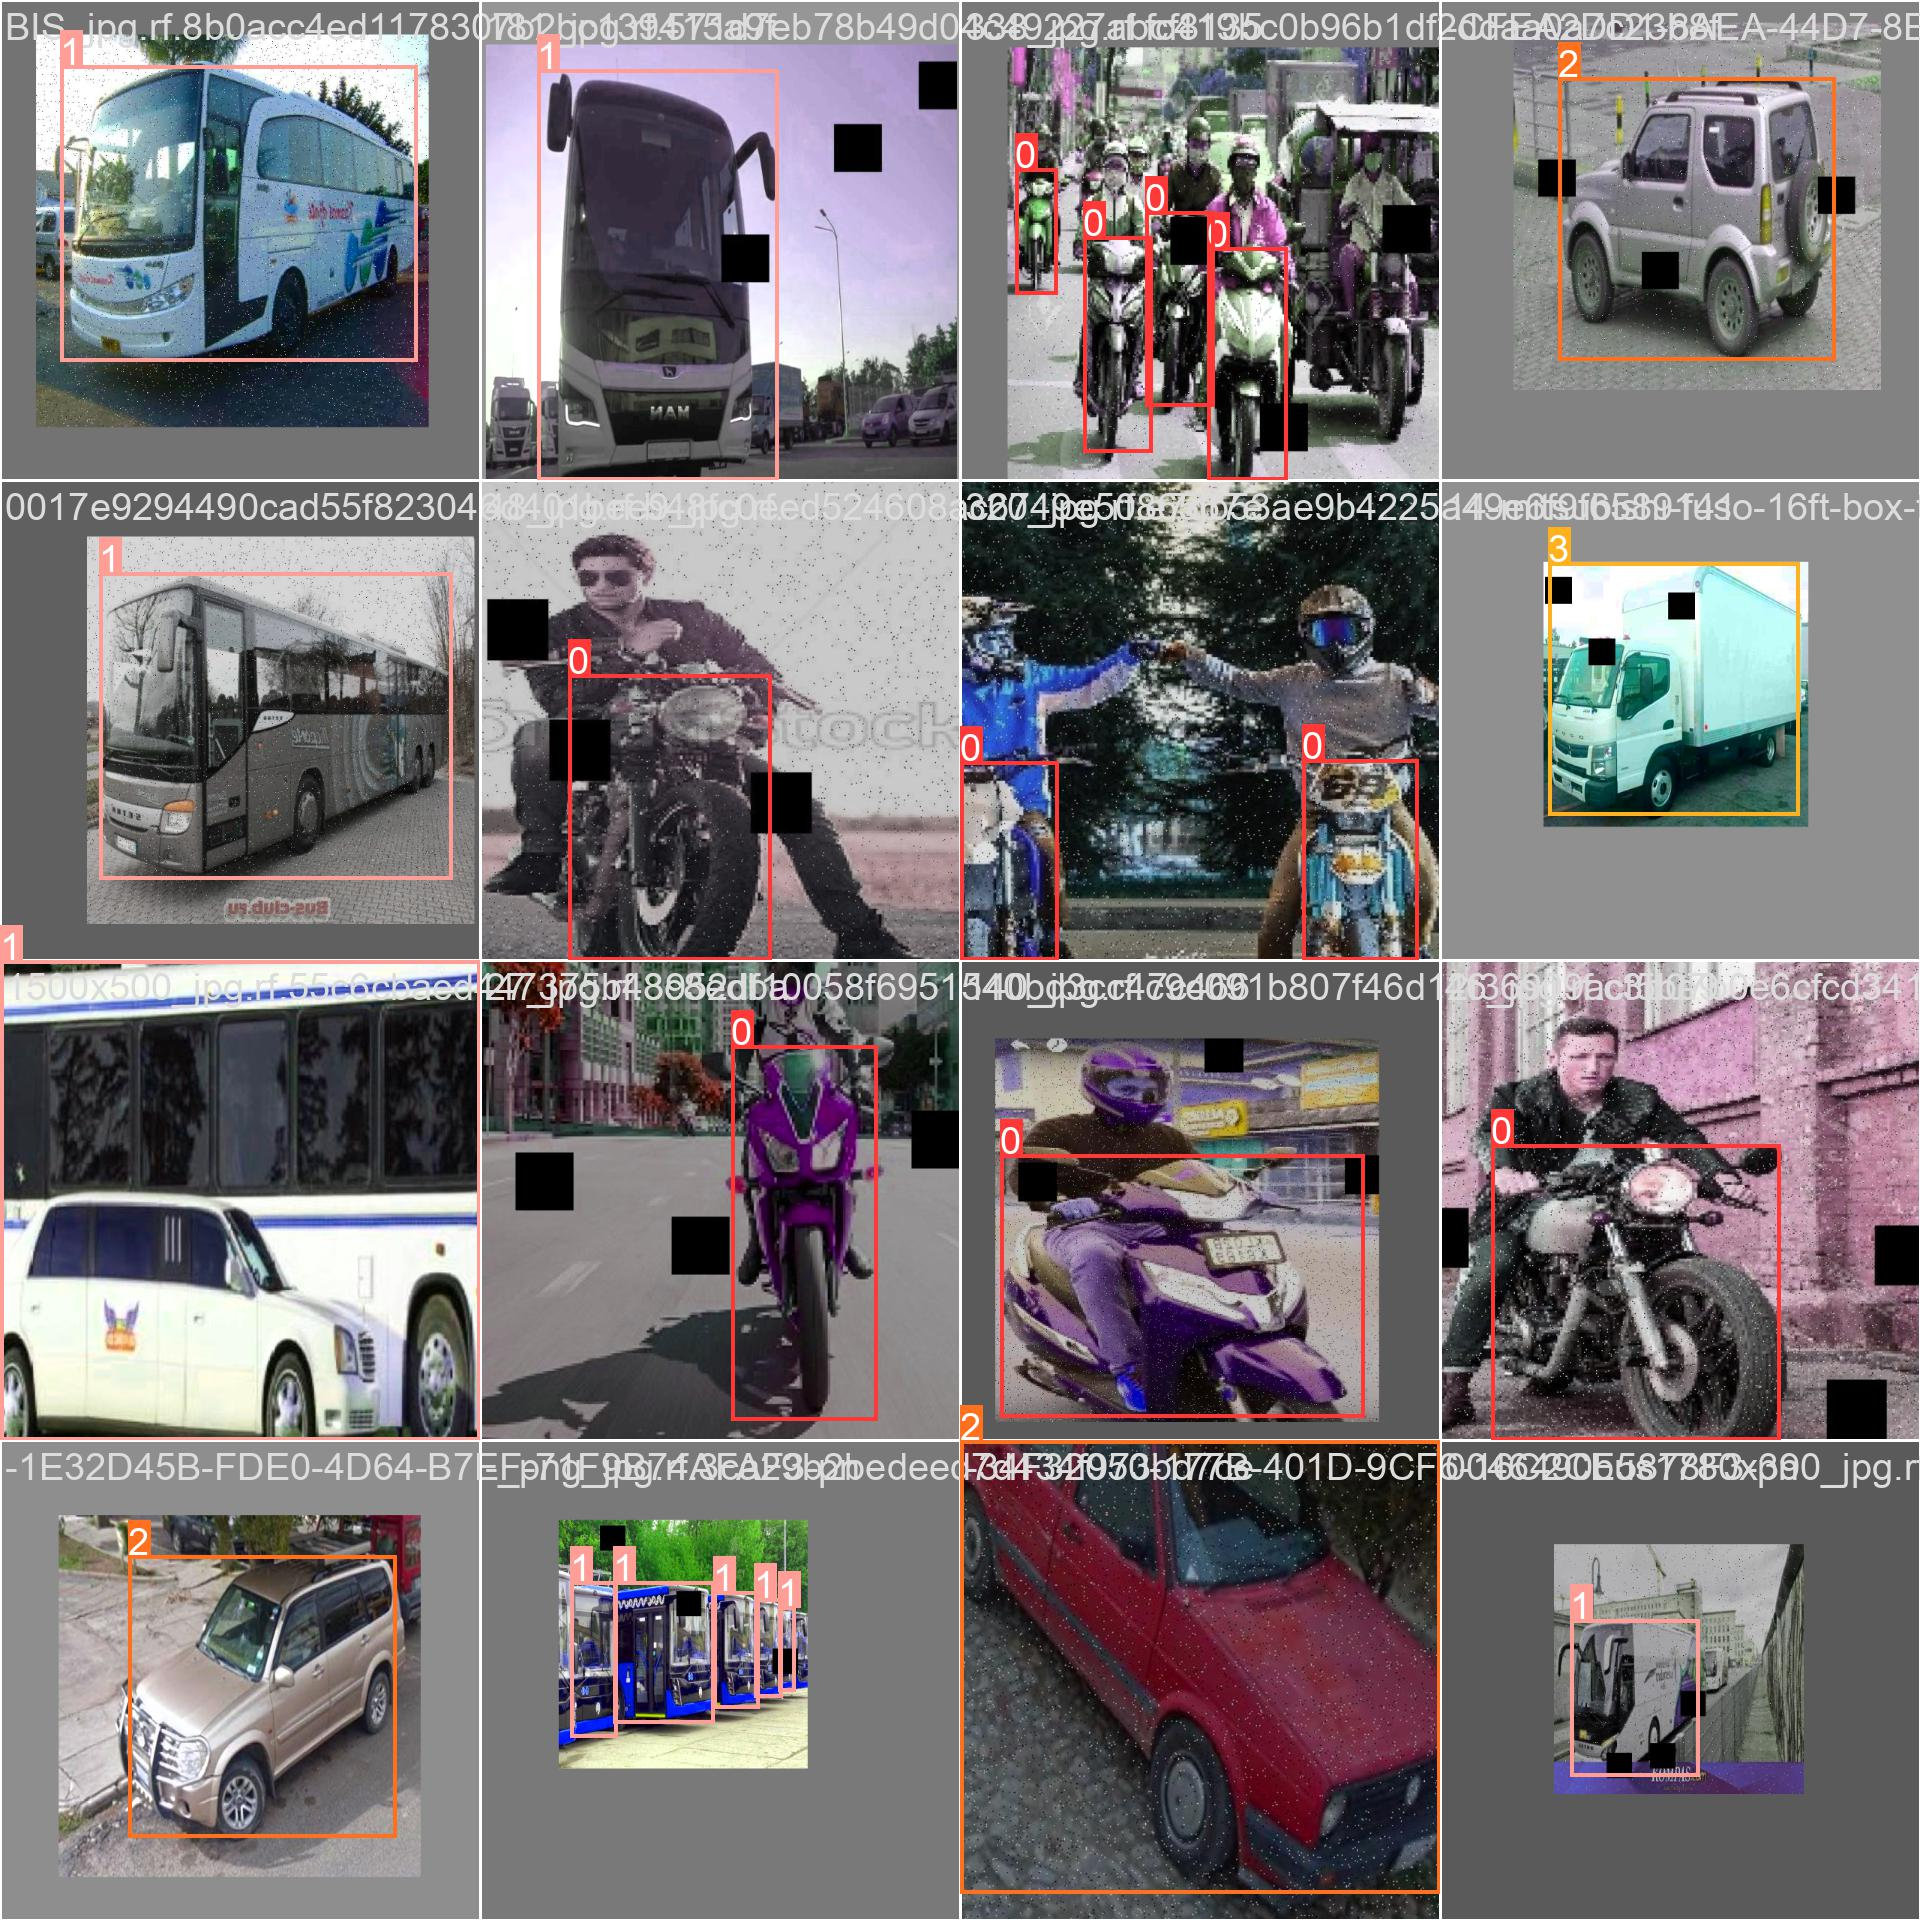

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/train_batch4780.jpg', width=600)

### Validation

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/thesis/vehicle_project/vehicles-3/valid/labels.cache... 1458 images, 0 backgrounds, 0 corrupt: 100% 1458/1458 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 80, len(boxes) = 2165. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 92/92 [00:51<00:00,  1.80it/s]
                   all       1458       2165      0.638      0.583      0.567      0.439
                     0       1458        696      0.971      0.991      0.993      0.767
                     1       1458        366      0.961      0.964      0.979      0.912
               

#### Confusion matrix

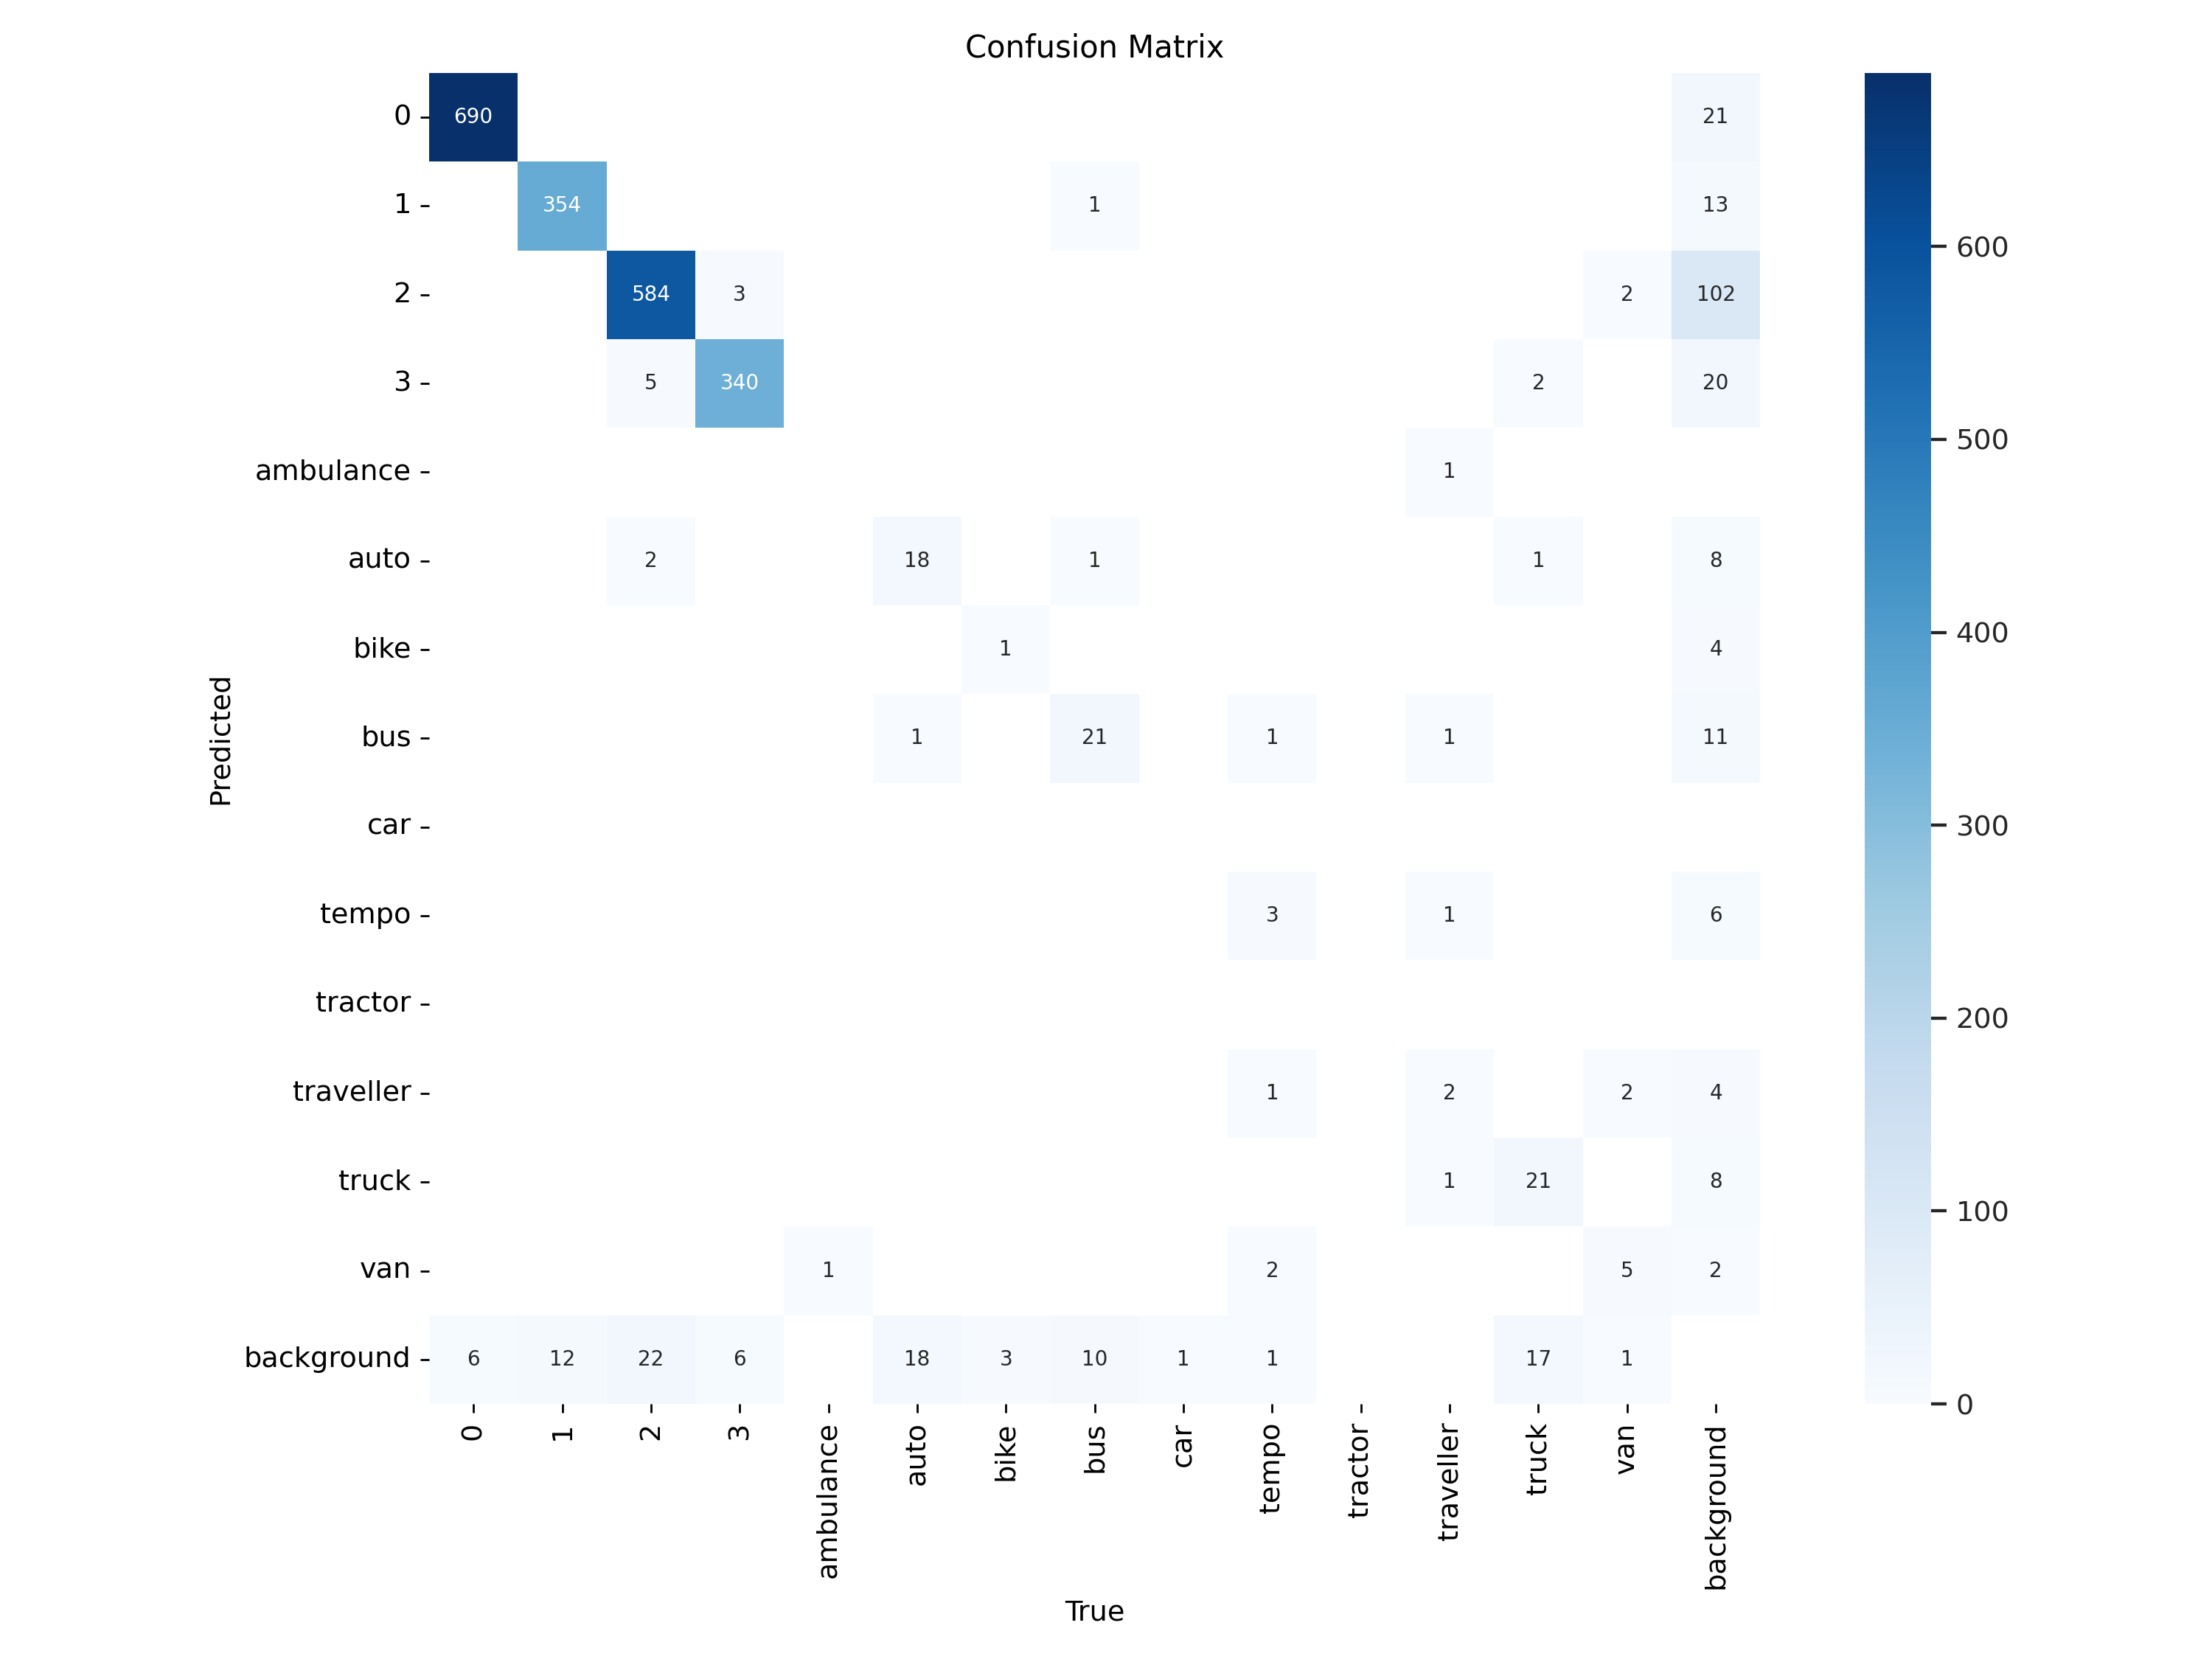

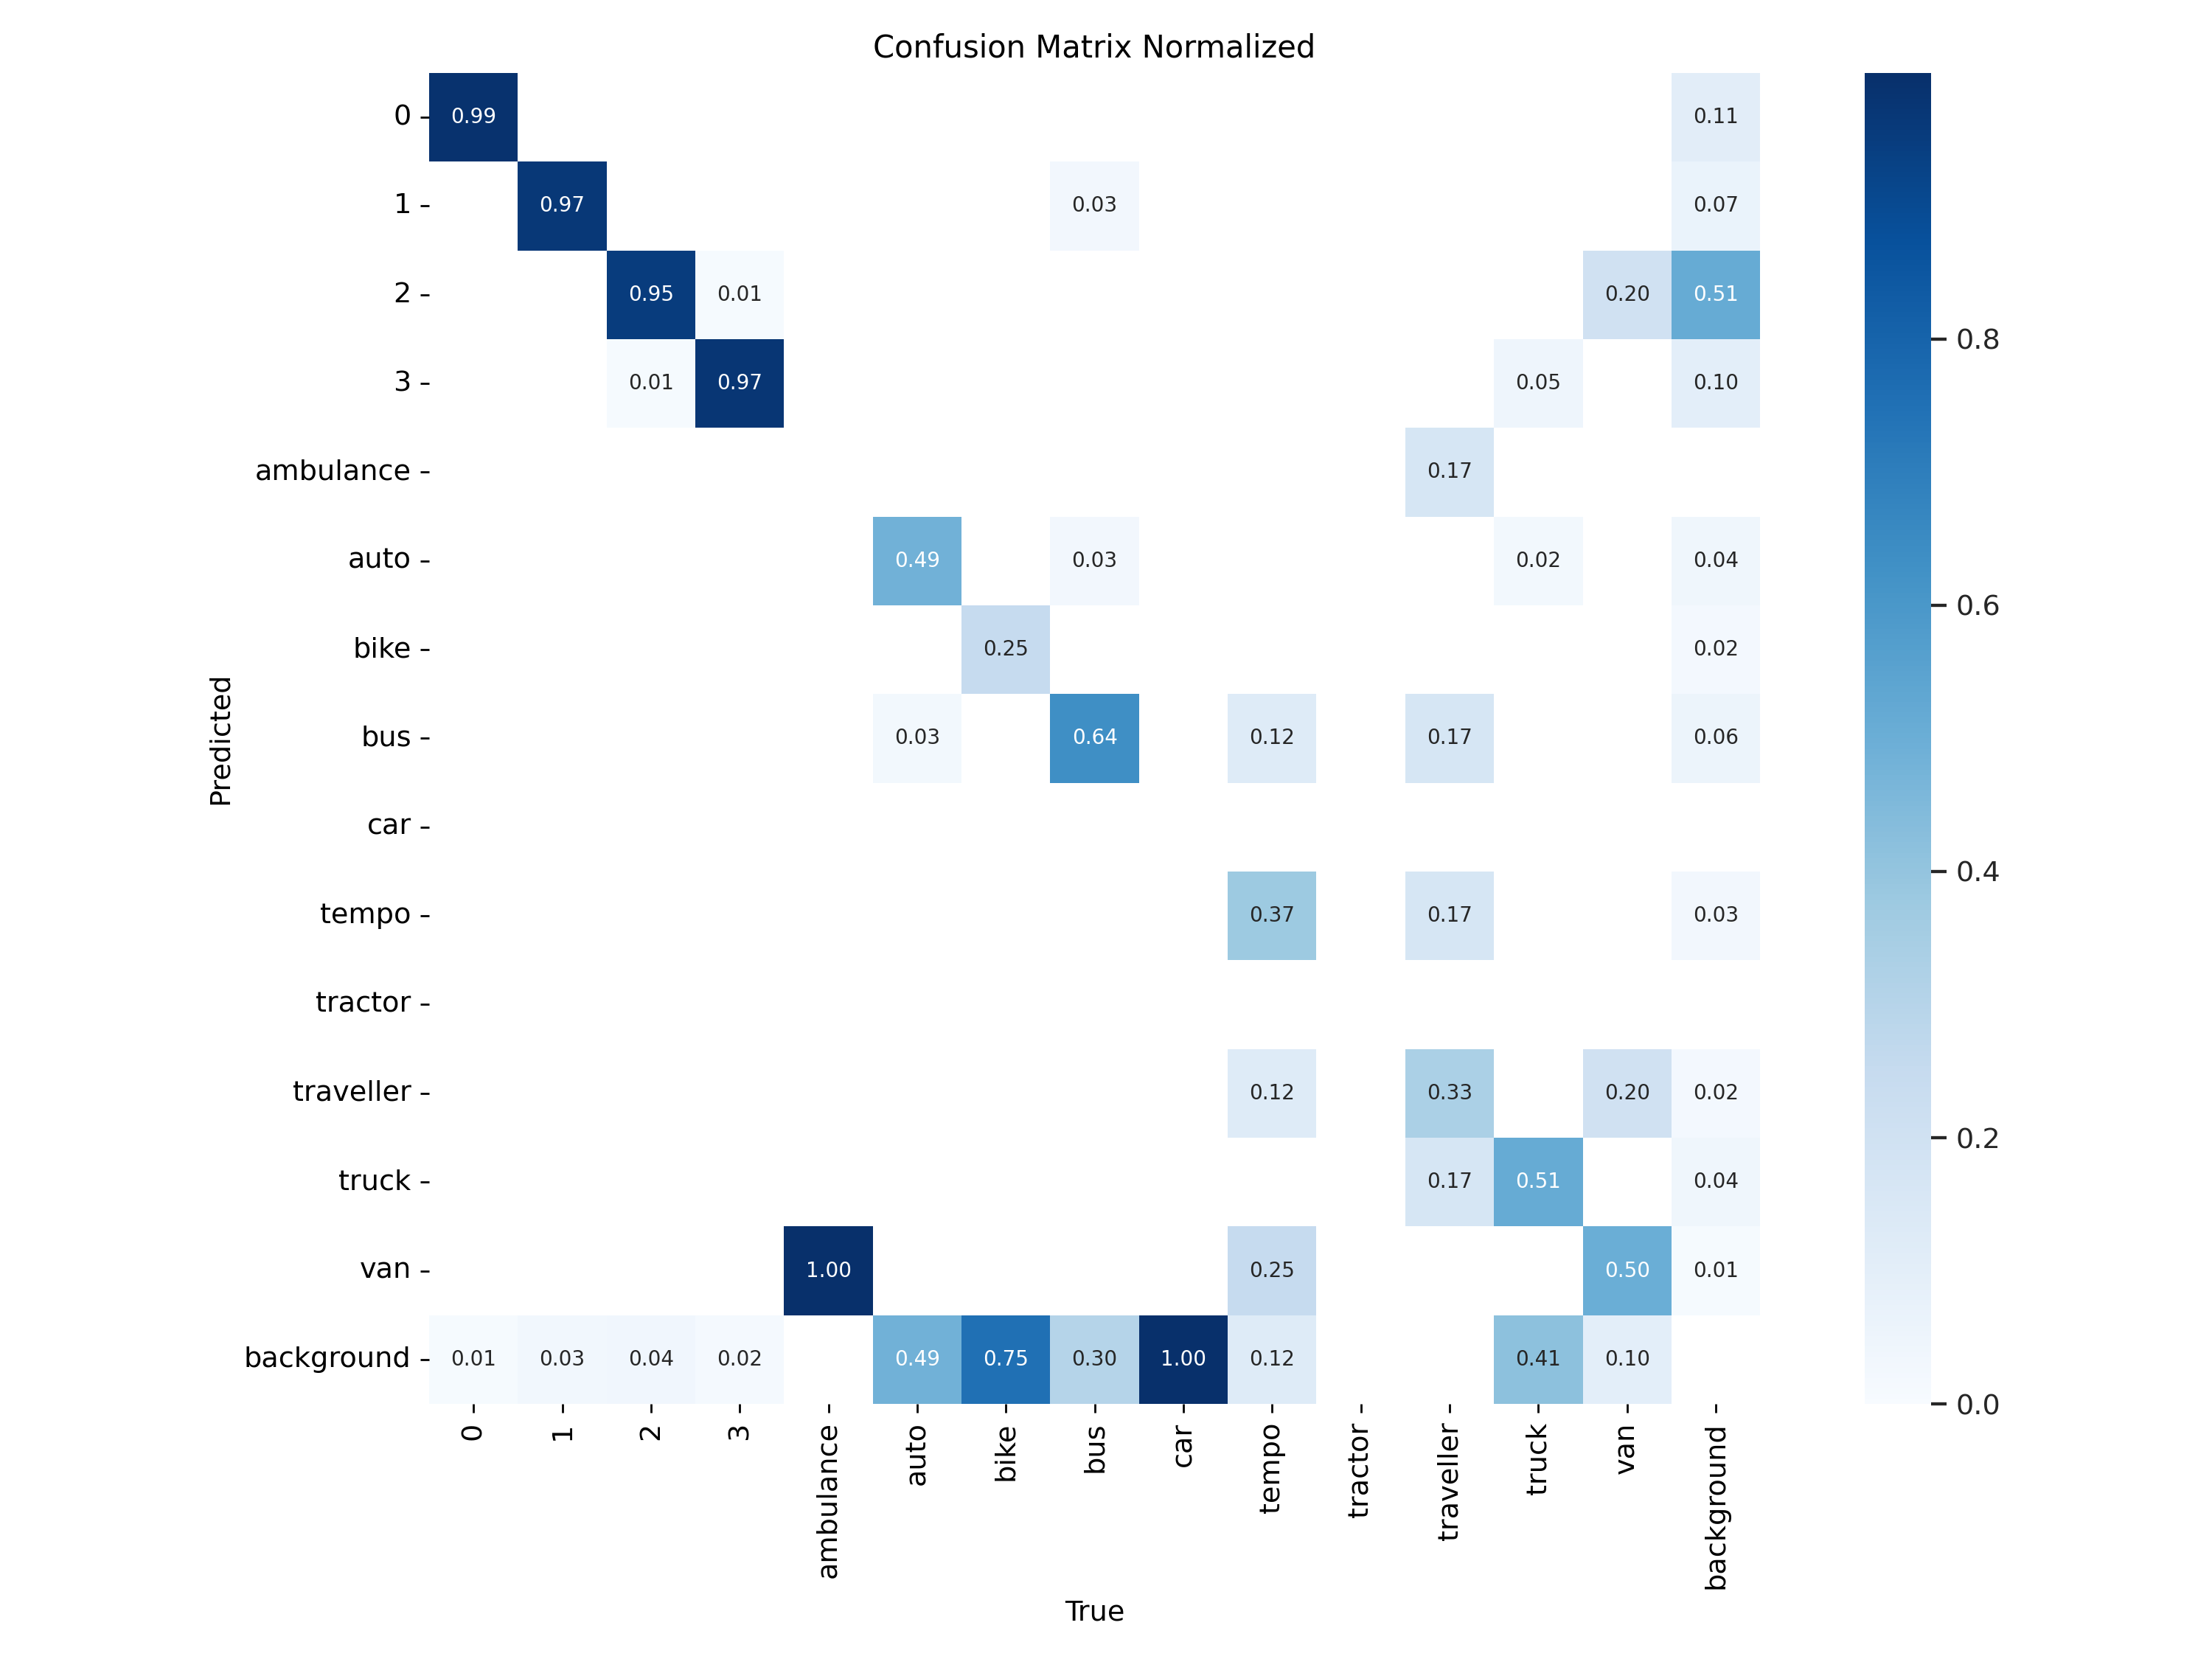

In [ ]:
display(Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/val/confusion_matrix.png', width=600) , Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/val/confusion_matrix_normalized.png', width=600))

#### Validation images

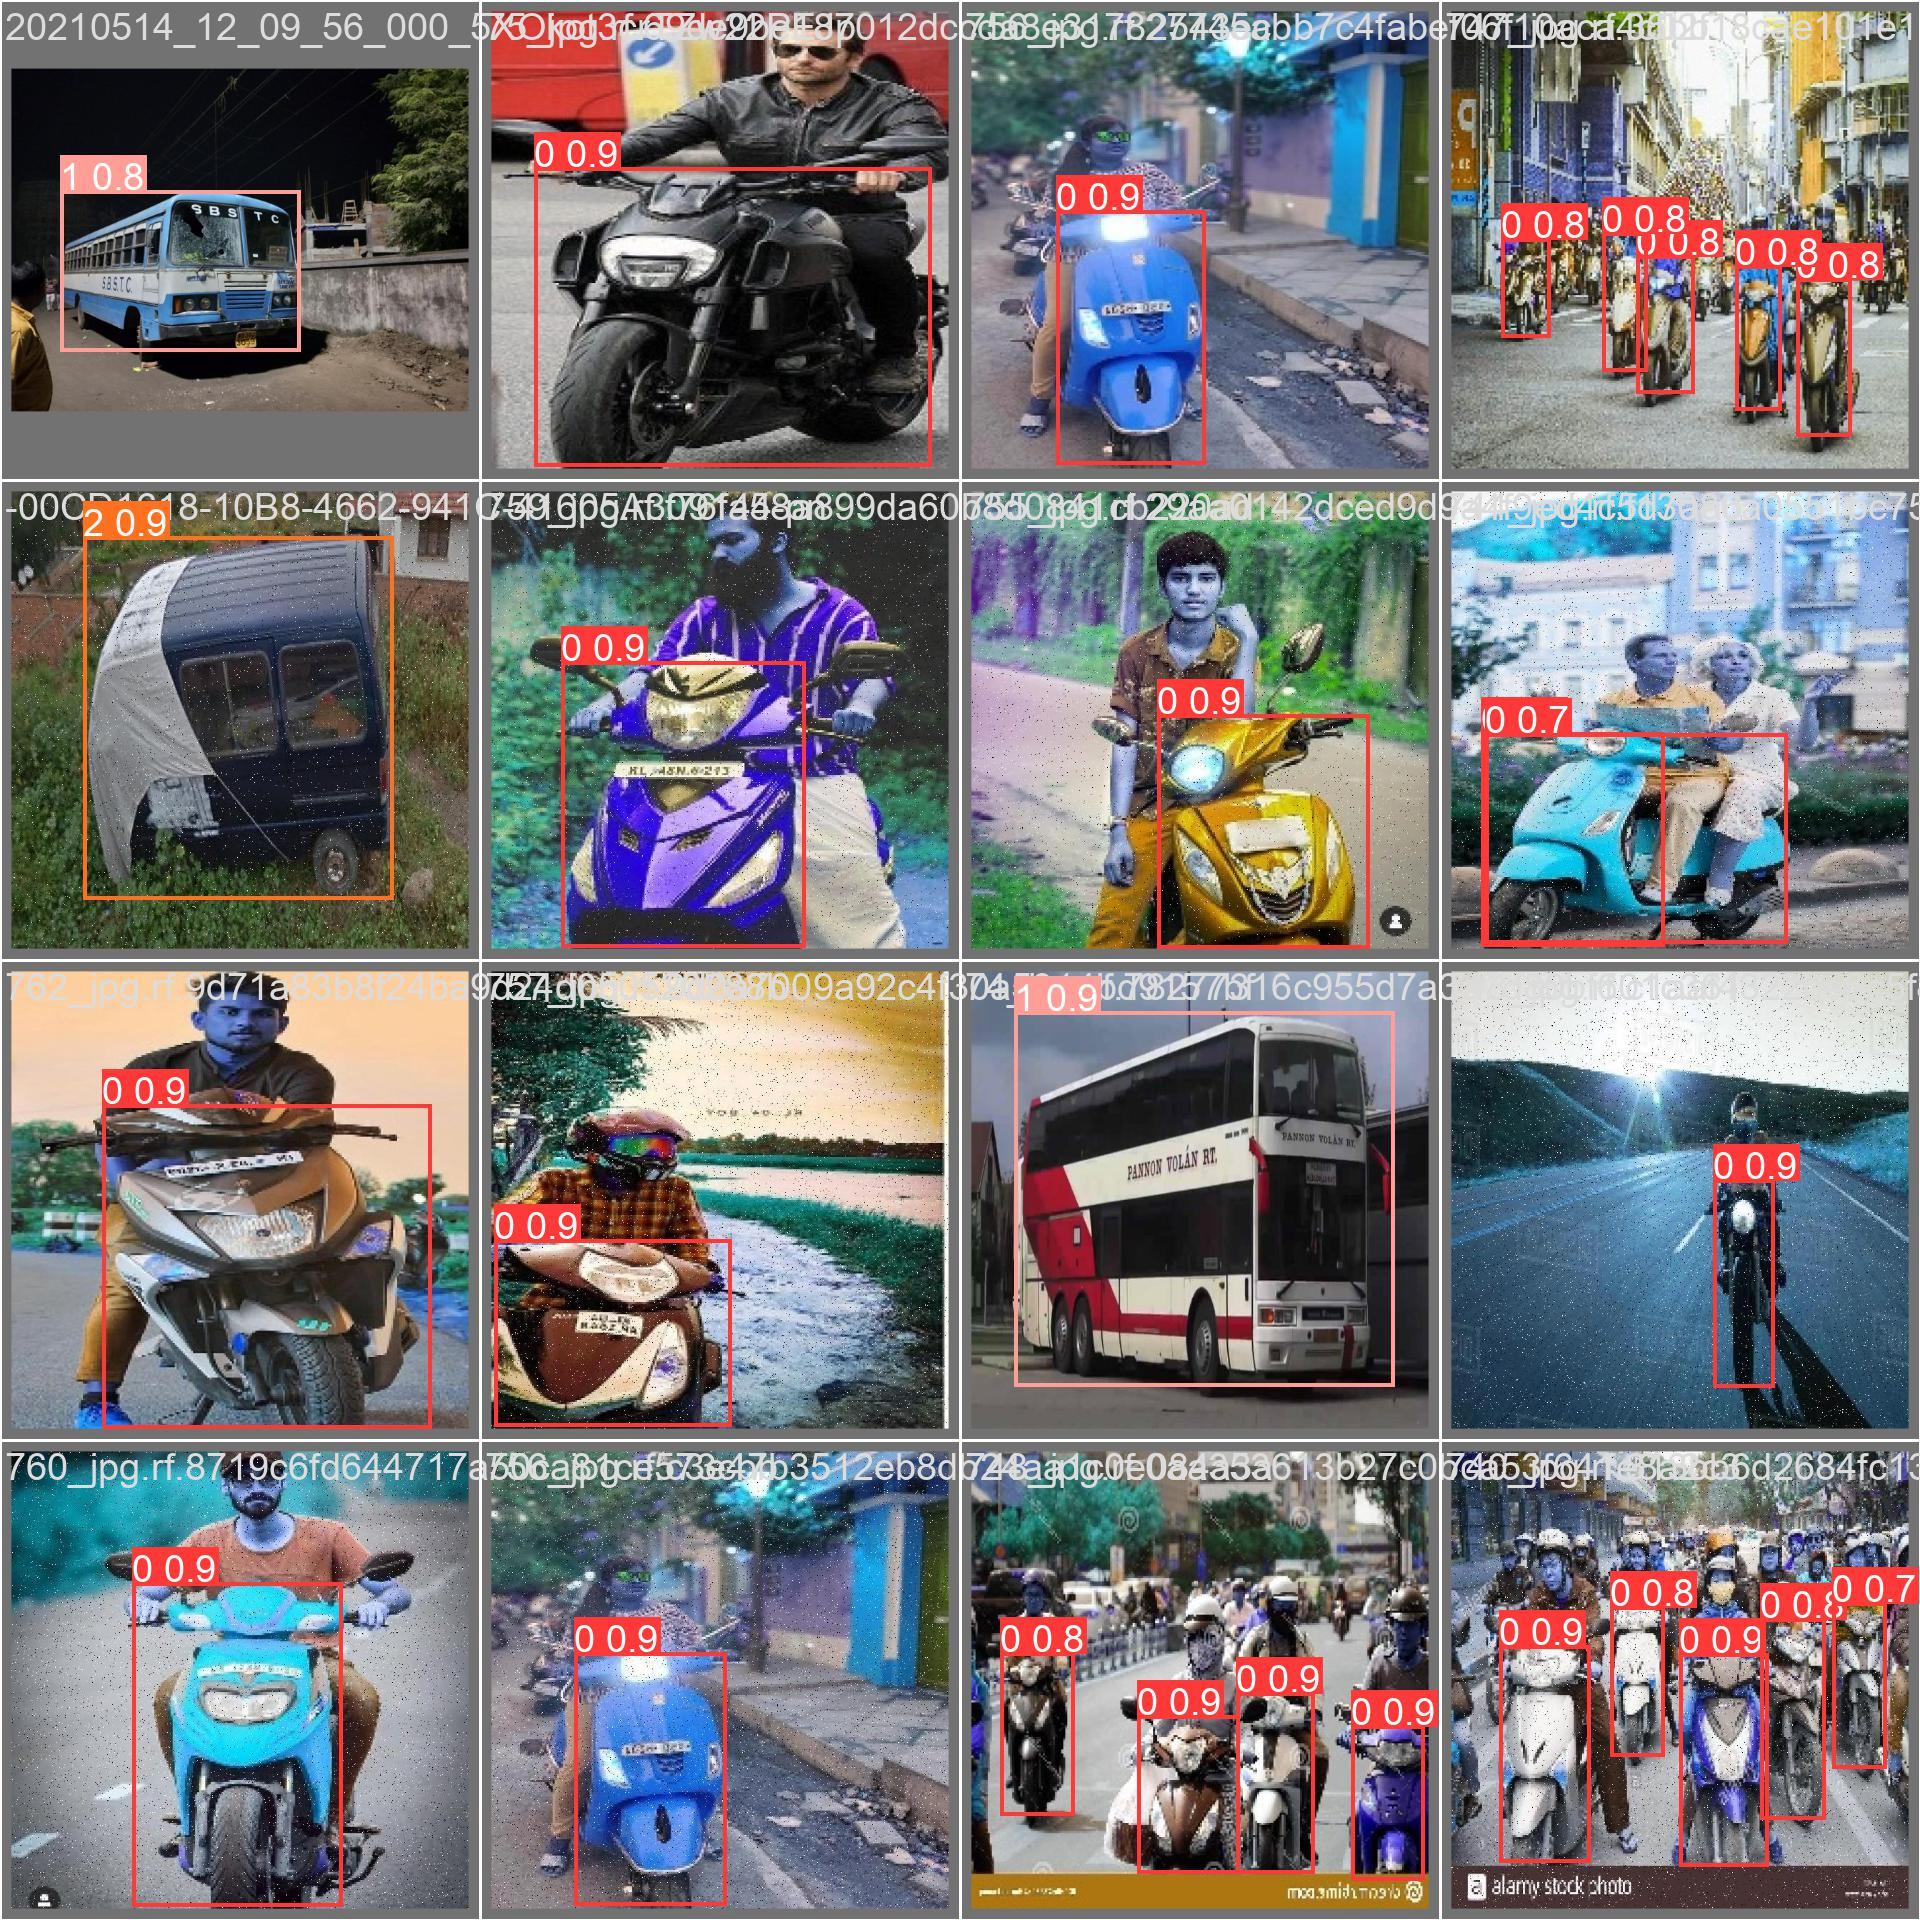

In [ ]:
Image(filename='/content/drive/MyDrive/thesis/vehicle_project/runs/detect/val/val_batch0_pred.jpg', width=600)

### Predict on test data (images)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/thesis/vehicle_project/vehicles-3/test/images

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients

image 1/737 /content/drive/MyDrive/thesis/vehicle_project/vehicles-3/test/images/-010CF27A-7EE3-4612-B311-61C641E550F5-png_jpg.rf.6a3679cfd278b9d2fa31aeaf1b50e351.jpg: 640x640 2 2s, 16.4ms
image 2/737 /content/drive/MyDrive/thesis/vehicle_project/vehicles-3/test/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.abaea764391fba2f64a9882907069512.jpg: 640x640 1 2, 16.4ms
image 3/737 /content/drive/MyDrive/thesis/vehicle_project/vehicles-3/test/images/-081E069C-5653-4461-A454-77BE153E5731-png_jpg.rf.14483ae4572ffcd040a7ee2c7d1dac69.jpg: 640x640 1 2, 16.3ms
image 4/737 /content/drive/MyDrive/thesis/vehicle_project/vehicles-3/test/images/-081E069C-5653-4461-A454-77BE153E5731-png_jpg.rf.e6c925f2133323b8e4321adc4538722a.jpg: 640x640 1 2, 16.3ms
image 5/737 /content/drive/MyDrive/thesis/vehicle_project/vehicles-3/test/images/-0C60C602

#### Predicted images

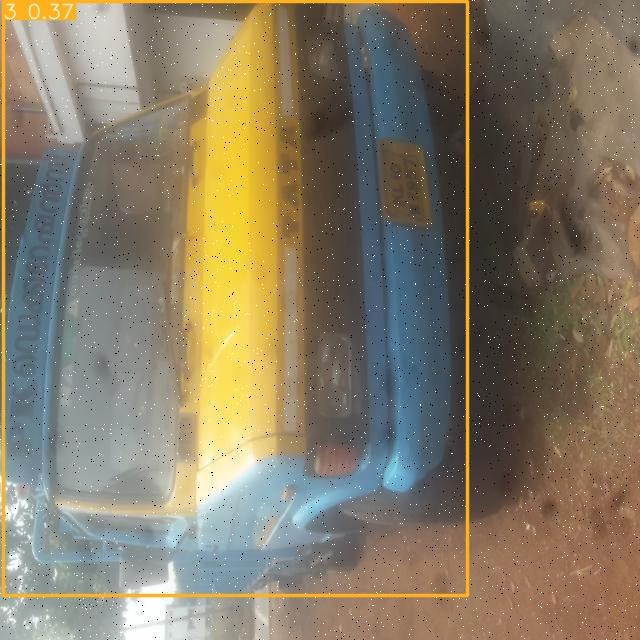

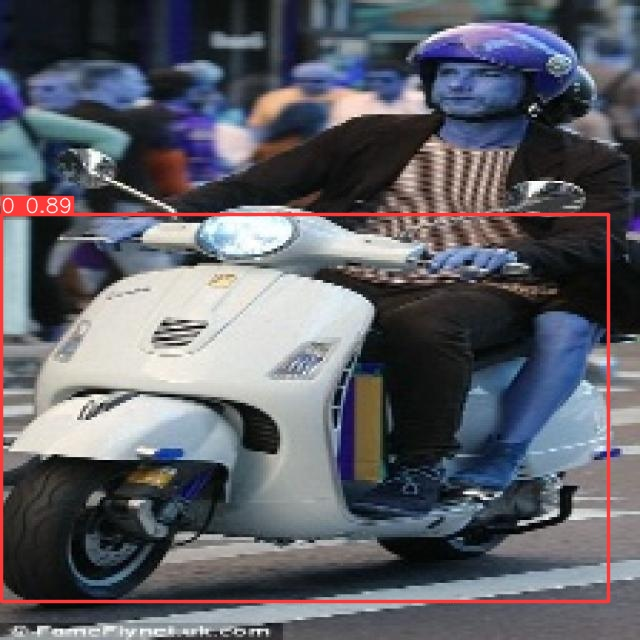

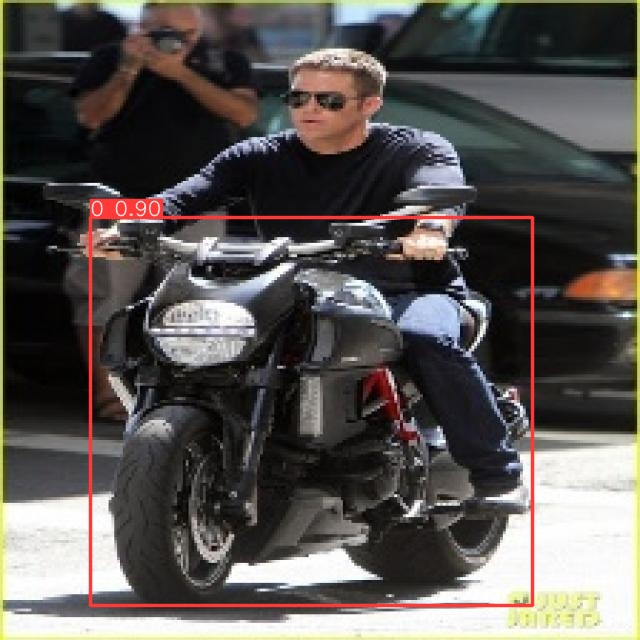

In [ ]:
import glob
import random
from IPython.display import Image, display

# Get the list of all image paths in the directory
image_paths = glob.glob('/content/drive/MyDrive/thesis/vehicle_project/runs/detect/predict/*.jpg')

# Randomly select three image paths from the list
random_image_paths = random.sample(image_paths, 3)

# Display the three randomly selected images
for image_path in random_image_paths:
    display(Image(filename=image_path, width=416))
    print("\n")

### Predict on test data (Videos)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/thesis/vehicle_project/test_videos

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients

video 1/1 (1/335) /content/drive/MyDrive/thesis/vehicle_project/test_videos/Traffic - 27260.mp4: 384x640 (no detections), 110.3ms
video 1/1 (2/335) /content/drive/MyDrive/thesis/vehicle_project/test_videos/Traffic - 27260.mp4: 384x640 (no detections), 11.1ms
video 1/1 (3/335) /content/drive/MyDrive/thesis/vehicle_project/test_videos/Traffic - 27260.mp4: 384x640 (no detections), 11.0ms
video 1/1 (4/335) /content/drive/MyDrive/thesis/vehicle_project/test_videos/Traffic - 27260.mp4: 384x640 (no detections), 11.1ms
video 1/1 (5/335) /content/drive/MyDrive/thesis/vehicle_project/test_videos/Traffic - 27260.mp4: 384x640 (no detections), 11.0ms
video 1/1 (6/335) /content/drive/MyDrive/thesis/vehicle_project/test_videos/Traffic - 27260.mp4: 384x640 (no detections), 11.0ms
video 1/1 (7/335) /content/drive/MyDrive/thesis/vehicle_project/test

### Install ByteTrack

In [ ]:
HOME = "/content"
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

### Install Roboflow Supervision

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

### Tracking utils

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

### Load trained YOLOv8 best model

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/thesis/vehicle_project/runs/detect/train/weights/best.pt")

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
#print(CLASS_NAMES_DICT)
CLASS_ID = list(CLASS_NAMES_DICT.keys())
#print(CLASS_ID)

### Predict and annotate Vehicle Count

In [ ]:
SOURCE_VIDEO_PATH = "/content/v1.mp4"
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)
TARGET_VIDEO_PATH = f"/content/drive/MyDrive/thesis/vehicle_project/result_videos/Traffic-counting-result.mp4"

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=960, height=540, fps=29, total_frames=335)

In [ ]:
color_list = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
# Create ColorPalette instance with the list of colors
color_palette = ColorPalette(colors=color_list)


In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/335 [00:00<?, ?it/s]


0: 384x640 (no detections), 574.5ms
Speed: 22.2ms preprocess, 574.5ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 397.9ms
Speed: 4.3ms preprocess, 397.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 392.2ms
Speed: 5.8ms preprocess, 392.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 394.6ms
Speed: 3.2ms preprocess, 394.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 381.3ms
Speed: 3.4ms preprocess, 381.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 371.6ms
Speed: 3.3ms preprocess, 371.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 388.2ms
Speed: 3.6ms preprocess, 388.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 374.3ms
Speed: 4.1ms pre

In [ ]:
SOURCE_VIDEO_PATH = "/content/vehicle-counting.mp4"
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)
TARGET_VIDEO_PATH = f"/content/drive/MyDrive/thesis/vehicle_project/result_videos/Traffic-counting-result3.mp4"

In [ ]:
from tqdm.notebook import tqdm

# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/538 [00:00<?, ?it/s]


0: 384x640 3 2s, 761.8ms
Speed: 8.8ms preprocess, 761.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 667.3ms
Speed: 3.9ms preprocess, 667.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 714.0ms
Speed: 5.1ms preprocess, 714.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 666.9ms
Speed: 5.1ms preprocess, 666.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 383.9ms
Speed: 4.2ms preprocess, 383.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 383.0ms
Speed: 4.4ms preprocess, 383.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 411.7ms
Speed: 6.7ms preprocess, 411.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 2s, 403.3ms
Speed: 4.1ms preprocess, 403.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x